1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Divide the dataset into 2 training and test sets
4. Use logistic model Regression. Try to apply different *solver* and *penalty* to find the best one.
5. Perform model on training set and test set
6. Measure performance of the model.
7. Which metric is your main metric and why? Which solver and penalty have you chosen? (<= 100 words)


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable. The final error based on my train and test set is low enough.
3. The data preprocessing is correct or make sense
4. The Feature engineering is correct or make sense
5. Any other additional process will be considered a small plus point.

- Age: This is the attribute that describes the age of the patient. There is data type $int64$, the highest value is 29, and the lowest is 77.
- Sex: This is the attribute indicating the gender of the patient, where 0 indicates male patient, 1 female patient.
- ChestPainType (cp): This is the attribute that indicates the patient's chest pain level. With levels 0, 1, 2, and 3.
- RestingBP (trestbps): This is the attribute that indicates the patient's blood pressure with data type $int64$, the value is in the range [94, 200]
- Cholesterol (chol): This attribute indicates the patient's cholesterol level as measured in the hospital. Has the data type $int64$, where the value is in [126, 564]
- FastingBS (fbs): This is an attribute that describes the patient's fasting blood sugar. In which, if the patient has more than 120mg/dl sugar = 1, otherwise = 0.
- RestingECG (restecg): This property displays the results of the ECG from 0 to 2 (0, 1, 2). Where each value indicates the severity of the pain.
- thaLach: Maximum heart rate achieved. Has data type $int64$, numeric value from 60 to 202.
<!-- - thalach: Patient's highest heart rate -->
<!-- - MaxHR: Maximum heart rate achieved. Has data type $int64$, numeric value from 60 to 202. -->
- ExerciseAngina (exang): Whether or not you have angina during exercise. Yes denotes 1, no denotes 0.
- Oldpeak: Attribute expressing the stress level of the patient. Has a value of type $float64$, the value is in [0, 6.2]
- ca: number of major vessels (0-3) colored by flourosopy
- ST\_Slope: Patient's condition during exercise. Includes [Upsloping, Flat, Down sloping] states that are sequentially digitized to [0, 1, 2].
- HeartDisease: Results of the patient's condition. 1 is for signs of heart disease, 0 is for no signs of heart disease.

## Load Dataset

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


PATH = "/content/" # Path to your file
os.chdir(PATH)
file = 'heart.csv'
%matplotlib inline

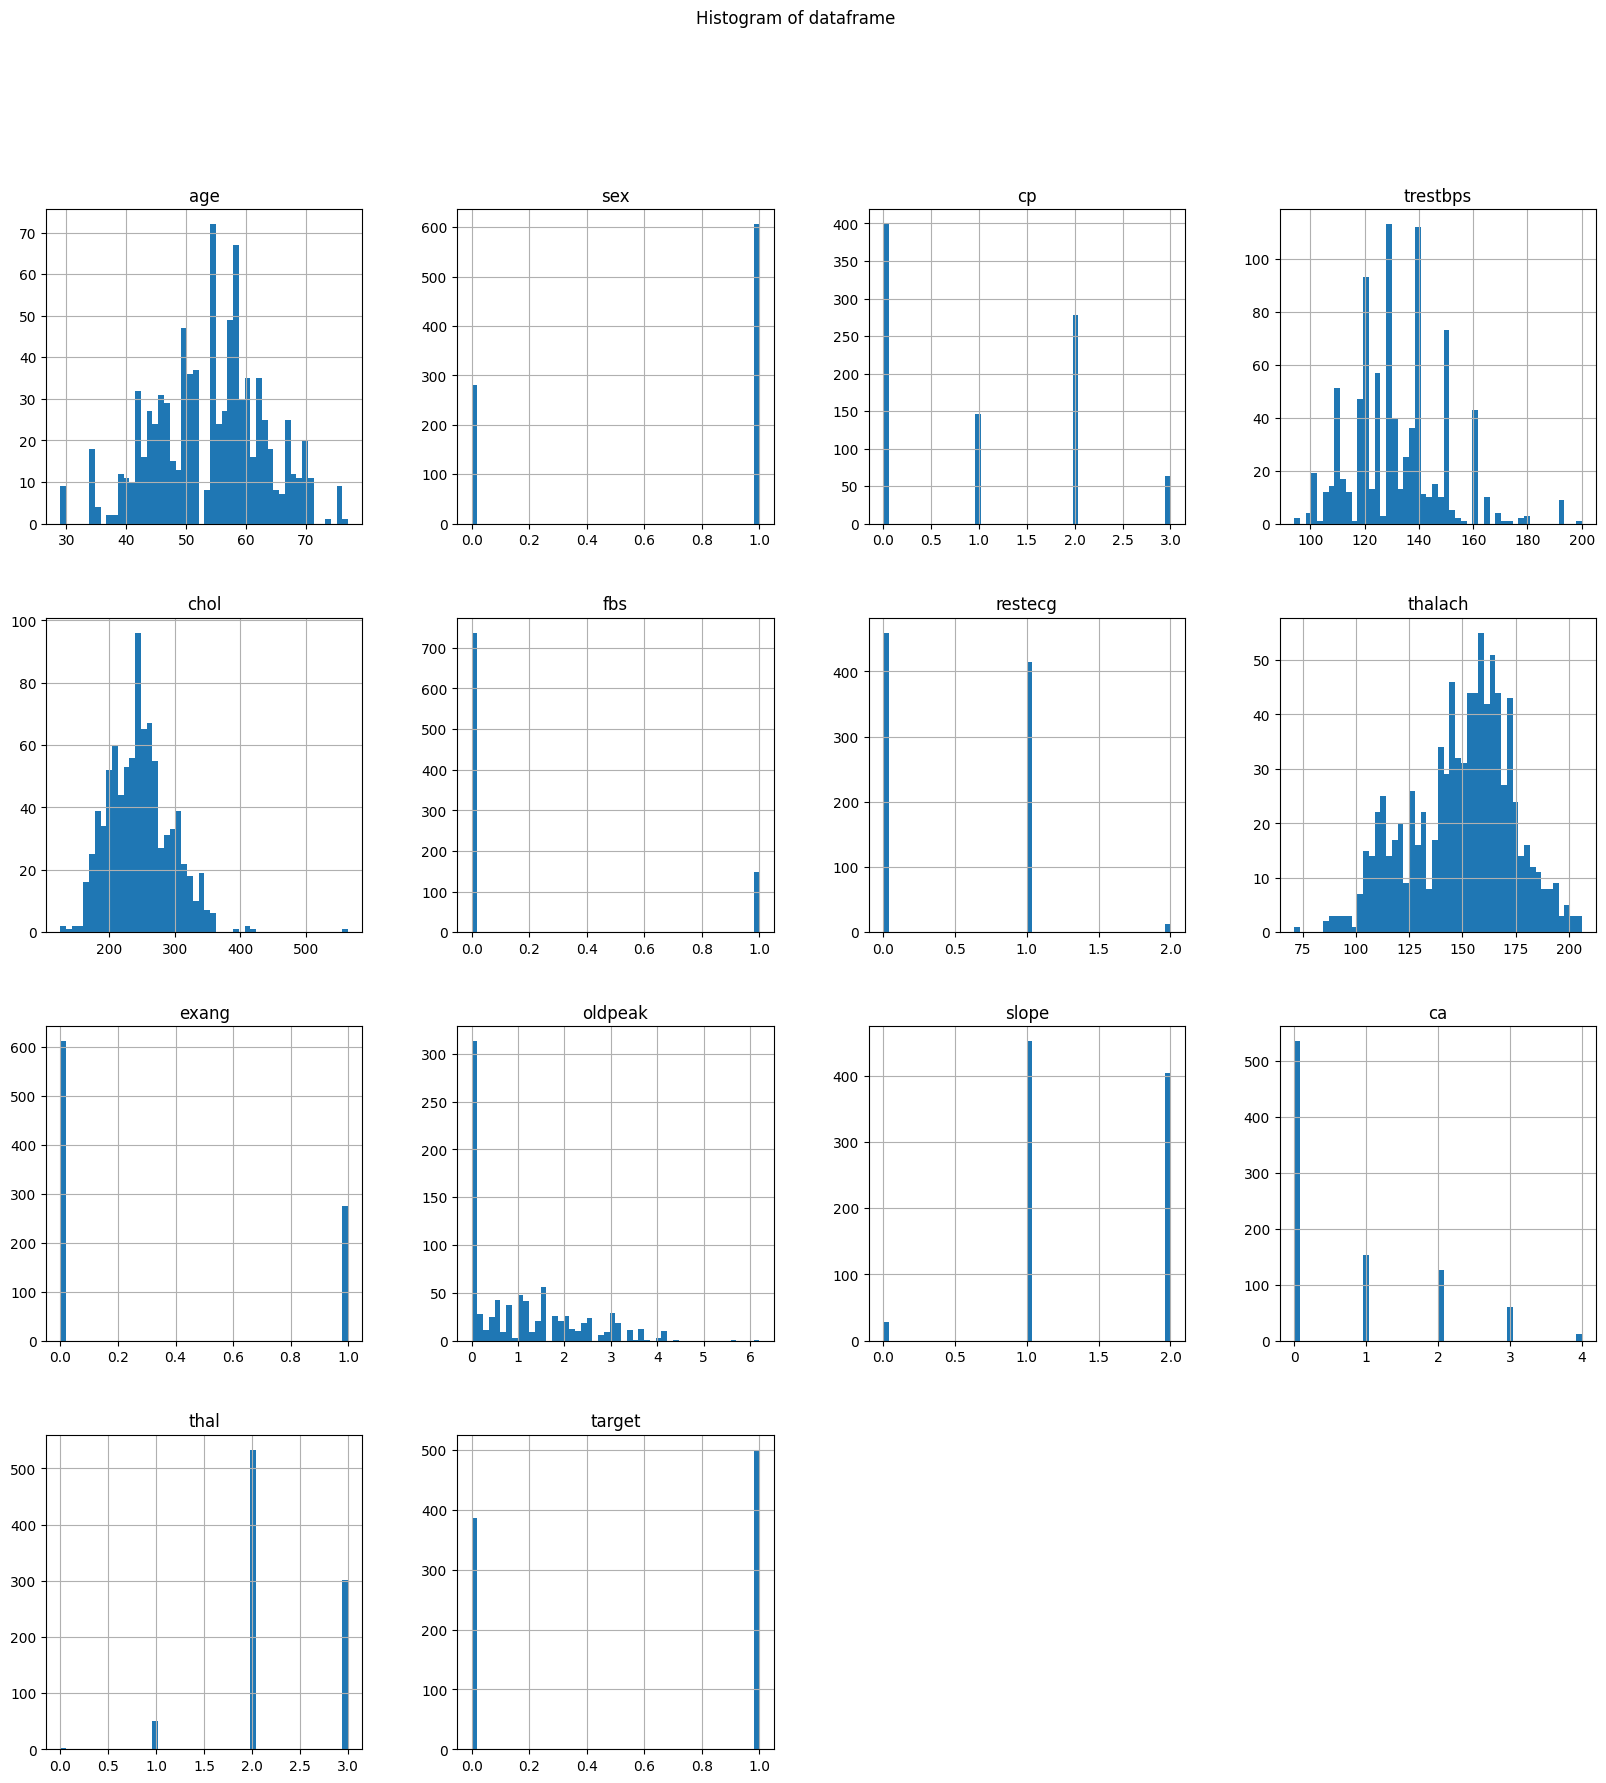

In [2]:
# Read dataset
df = pd.read_csv(file)
#ToDo: Show histogram of dataframe

# Plot histogram of dataframe
df.hist(figsize=(20,20), bins=50)

# Set title for histogram
plt.suptitle('Histogram of dataframe')
plt.show()

**Nhận xét:**
* Dữ liệu khá cân bằng giữa 2 loại nhãn 
* Với các đặc trưng Age, trebps, chol, thalach độ phủ của dữ liệu khá rộng
* OldPeak nghiêng hẳn về bên trái và số lượng giá trị tại 0 là nhiều nhất
* sex, cp, fbs, restecg, exang, slope, ca, thal là các biến giá trị rời rạc

## Data Analysis

In [3]:
# Data analysis
# Todo: analyze your data here

* Kiểm tra thông tin dữ liệu

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       886 non-null    int64  
 1   sex       886 non-null    int64  
 2   cp        886 non-null    int64  
 3   trestbps  886 non-null    int64  
 4   chol      886 non-null    int64  
 5   fbs       886 non-null    int64  
 6   restecg   886 non-null    int64  
 7   thalach   886 non-null    int64  
 8   exang     886 non-null    int64  
 9   oldpeak   886 non-null    float64
 10  slope     886 non-null    int64  
 11  ca        886 non-null    int64  
 12  thal      886 non-null    int64  
 13  target    886 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 97.0 KB


* Thống kê mô tả cho dữ liệu

In [5]:
categorical_col = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
continous_col = list(df.columns.difference(categorical_col))
continous_col.remove('target')

# Đối với biến rời rạc 
display('Thong ke mo ta cho bien roi rac',df[categorical_col].describe())

# Đối với biến liên tục 
display('Thong ke mo ta cho bien lien tuc',df[continous_col].describe())

'Thong ke mo ta cho bien roi rac'

,sex,cp,fbs,restecg,exang,slope,ca,thal
count,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000
mean,0.683973,1.005643,0.168172,0.495485,0.310384,1.424379,0.714447,2.278781
std,0.465186,1.024542,0.374230,0.526669,0.462912,0.556861,1.028825,0.572576
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000
75%,1.000000,2.000000,0.000000,1.000000,1.000000,2.000000,1.000000,3.000000
max,1.000000,3.000000,1.000000,2.000000,1.000000,2.000000,4.000000,3.000000


'Thong ke mo ta cho bien lien tuc'

,age,chol,oldpeak,thalach,trestbps
count,886.000000,886.000000,886.000000,886.000000,886.000000
mean,54.007901,247.497743,1.083296,149.492099,132.117381
std,9.126292,47.209995,1.147935,23.921327,16.807511
min,29.000000,126.000000,0.000000,71.000000,94.000000
25%,47.000000,212.000000,0.000000,133.000000,120.000000
50%,54.000000,245.000000,0.800000,153.000000,130.000000
75%,60.000000,274.000000,1.800000,166.000000,140.000000
max,77.000000,564.000000,6.200000,206.000000,200.000000


* Kiểm tra giá trị ở các cột rời rạc

In [6]:
for col in categorical_col:
    print('Dac trung: ', col)
    display(df[col].value_counts())

Dac trung:  sex


1    606
0    280
Name: sex, dtype: int64

Dac trung:  cp


0    399
2    278
1    146
3     63
Name: cp, dtype: int64

Dac trung:  fbs


0    737
1    149
Name: fbs, dtype: int64

Dac trung:  restecg


0    459
1    415
2     12
Name: restecg, dtype: int64

Dac trung:  exang


0    611
1    275
Name: exang, dtype: int64

Dac trung:  slope


1    452
2    405
0     29
Name: slope, dtype: int64

Dac trung:  ca


0    535
1    153
2    126
3     60
4     12
Name: ca, dtype: int64

Dac trung:  thal


2    533
3    301
1     50
0      2
Name: thal, dtype: int64

In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**Nhận xét**:
* Dữ liệu không tồn tại giá trị Nan hoặc Null

* Quan sát phân bố dữ liệu các biến rời rạc theo nhãn

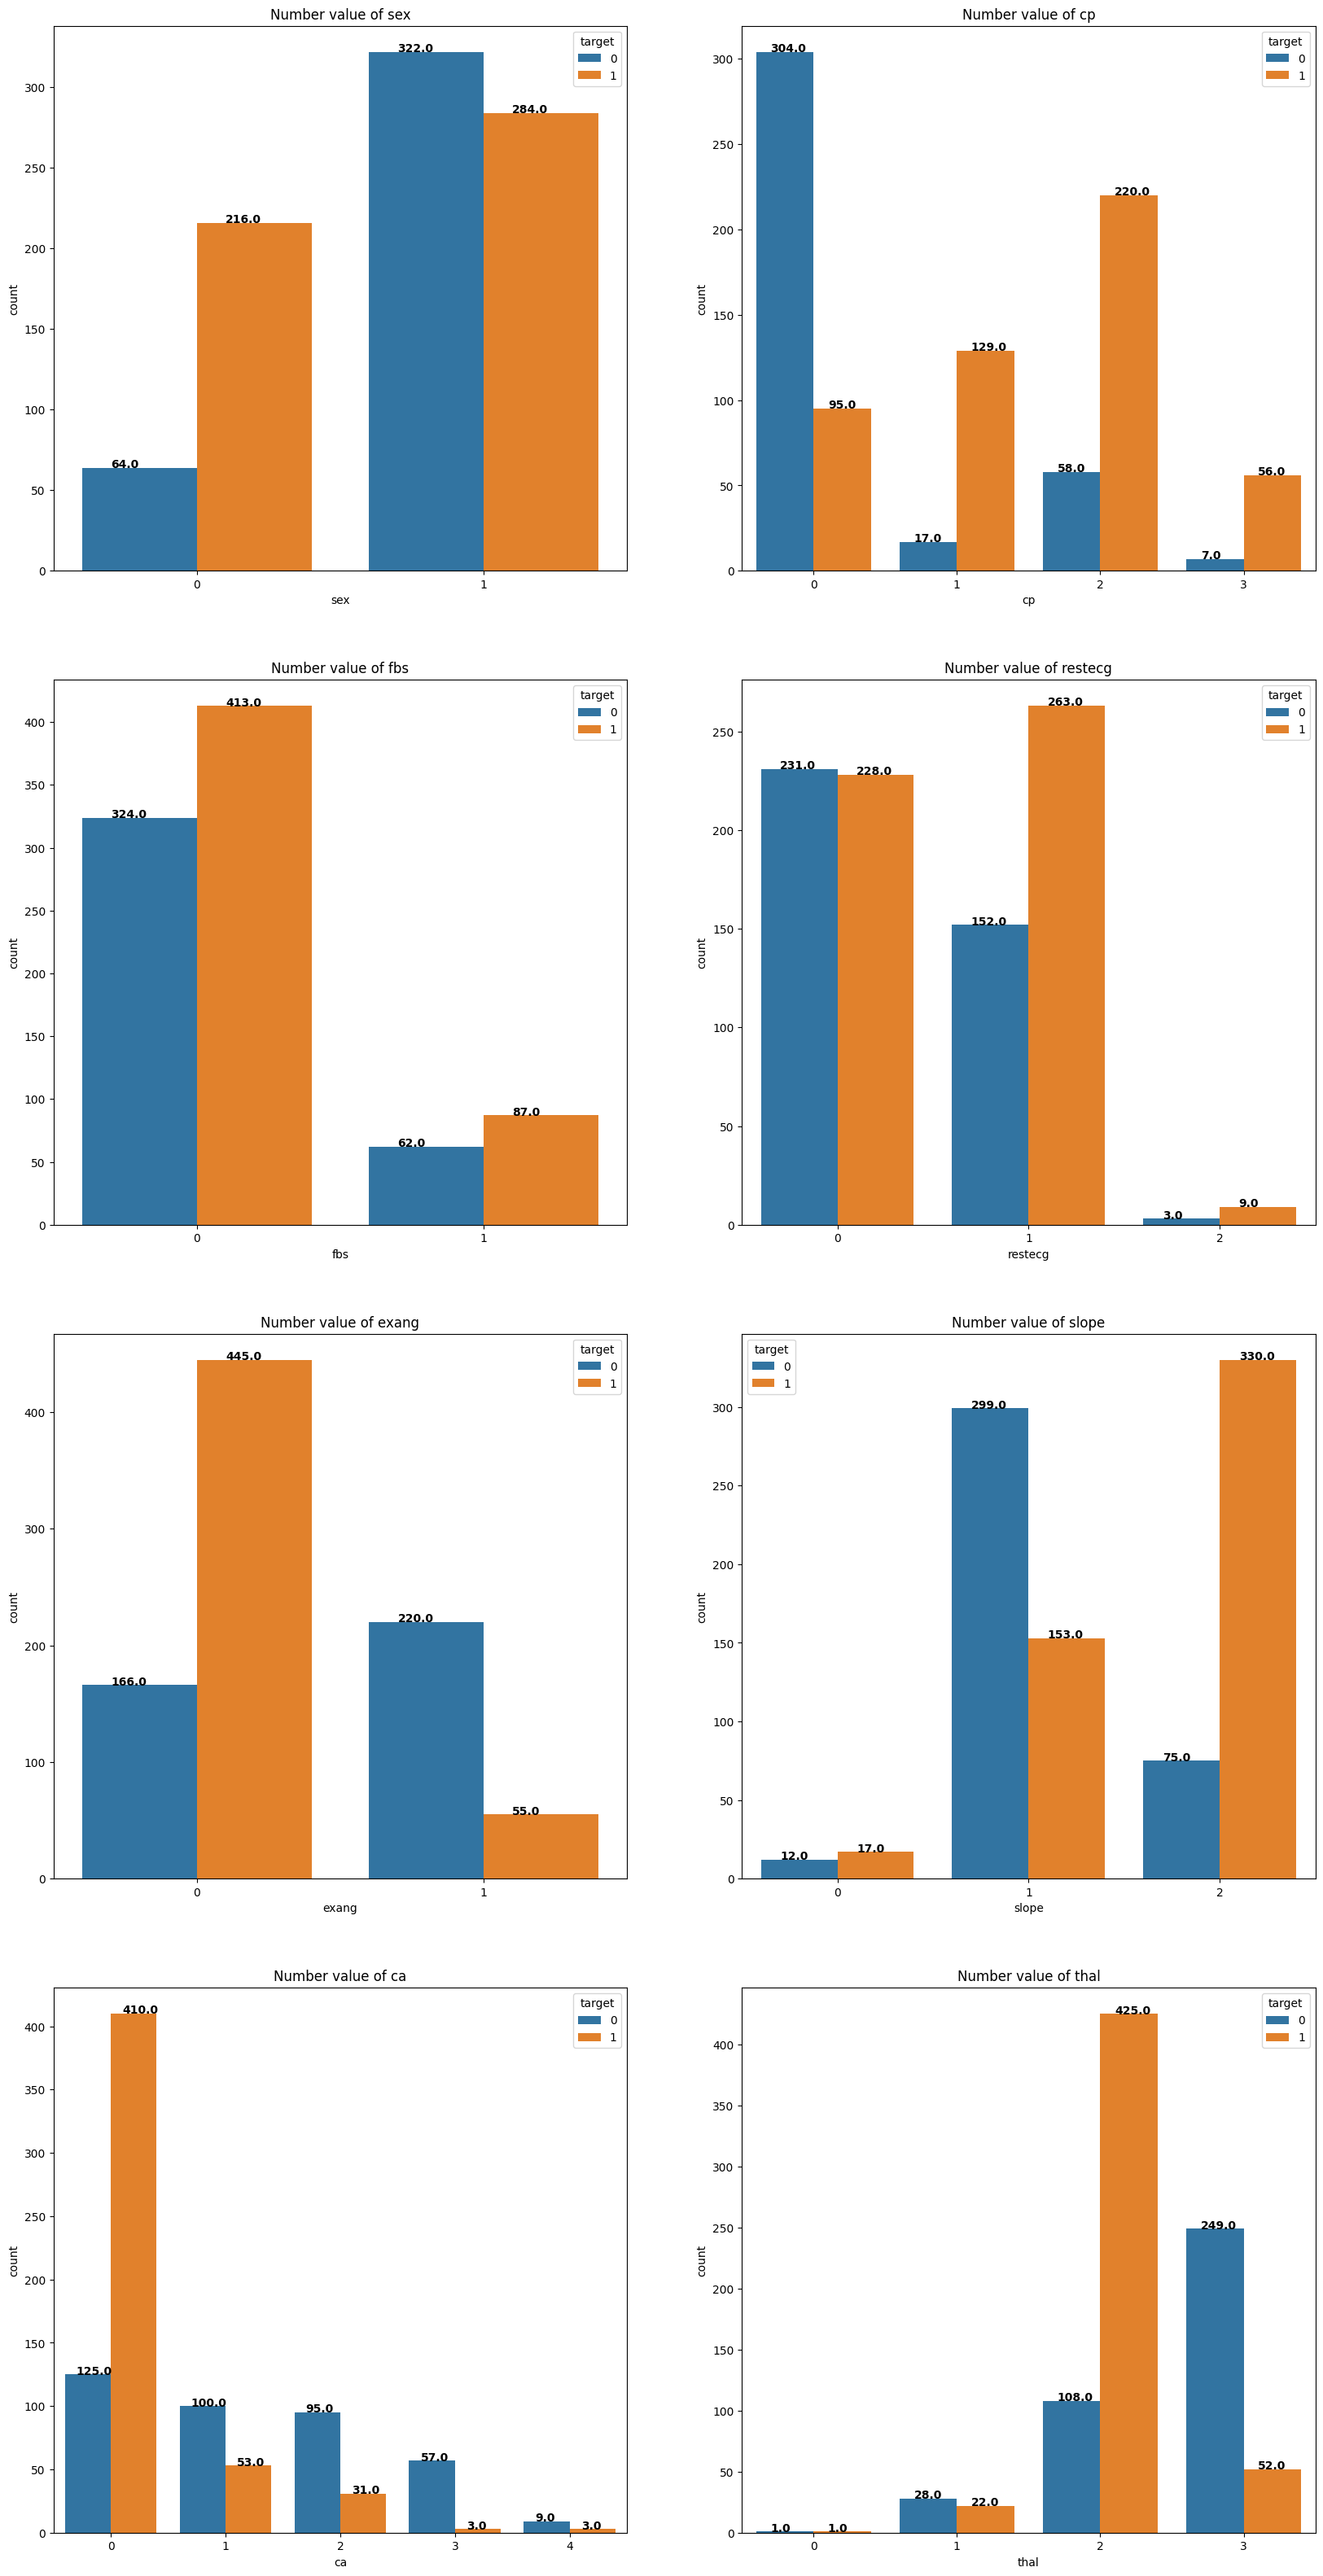

In [8]:
import seaborn as sns

_, ax = plt.subplots(4,2, figsize=(20,40))
ax = ax.ravel()
for i,col in enumerate(categorical_col):
    sns.countplot(x=col, data=df, hue='target', ax = ax[i])
    ax[i].set_title('Number value of {}'.format(col))
    for j in ax[i].patches:
        ax[i].text(j.get_x()+0.1, j.get_height()+0.1, str(round((j.get_height()), 2)),fontweight='bold', fontsize=10, color='black')

* Thống kê nhãn của dữ liệu

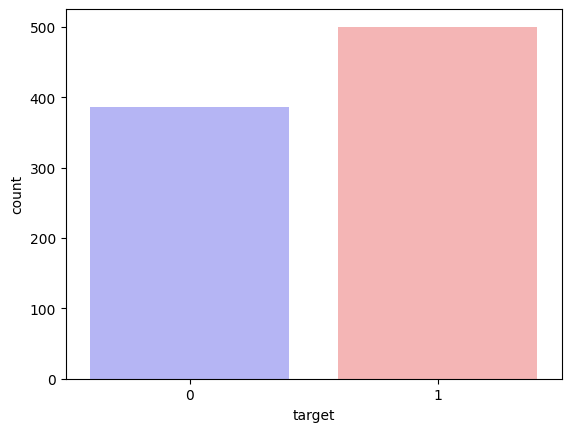

In [9]:
sns.countplot(x = 'target', data = df, palette = 'bwr')
plt.show()

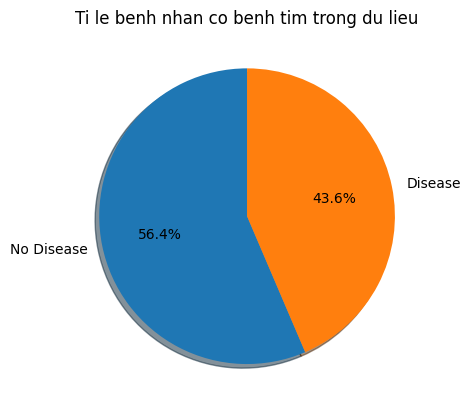

In [10]:
plt.pie(df['target'].value_counts(), labels = ['No Disease', 'Disease'], autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Ti le benh nhan co benh tim trong du lieu')
plt.show()

* Quan sát phân bố dữ liệu các biến liên tục

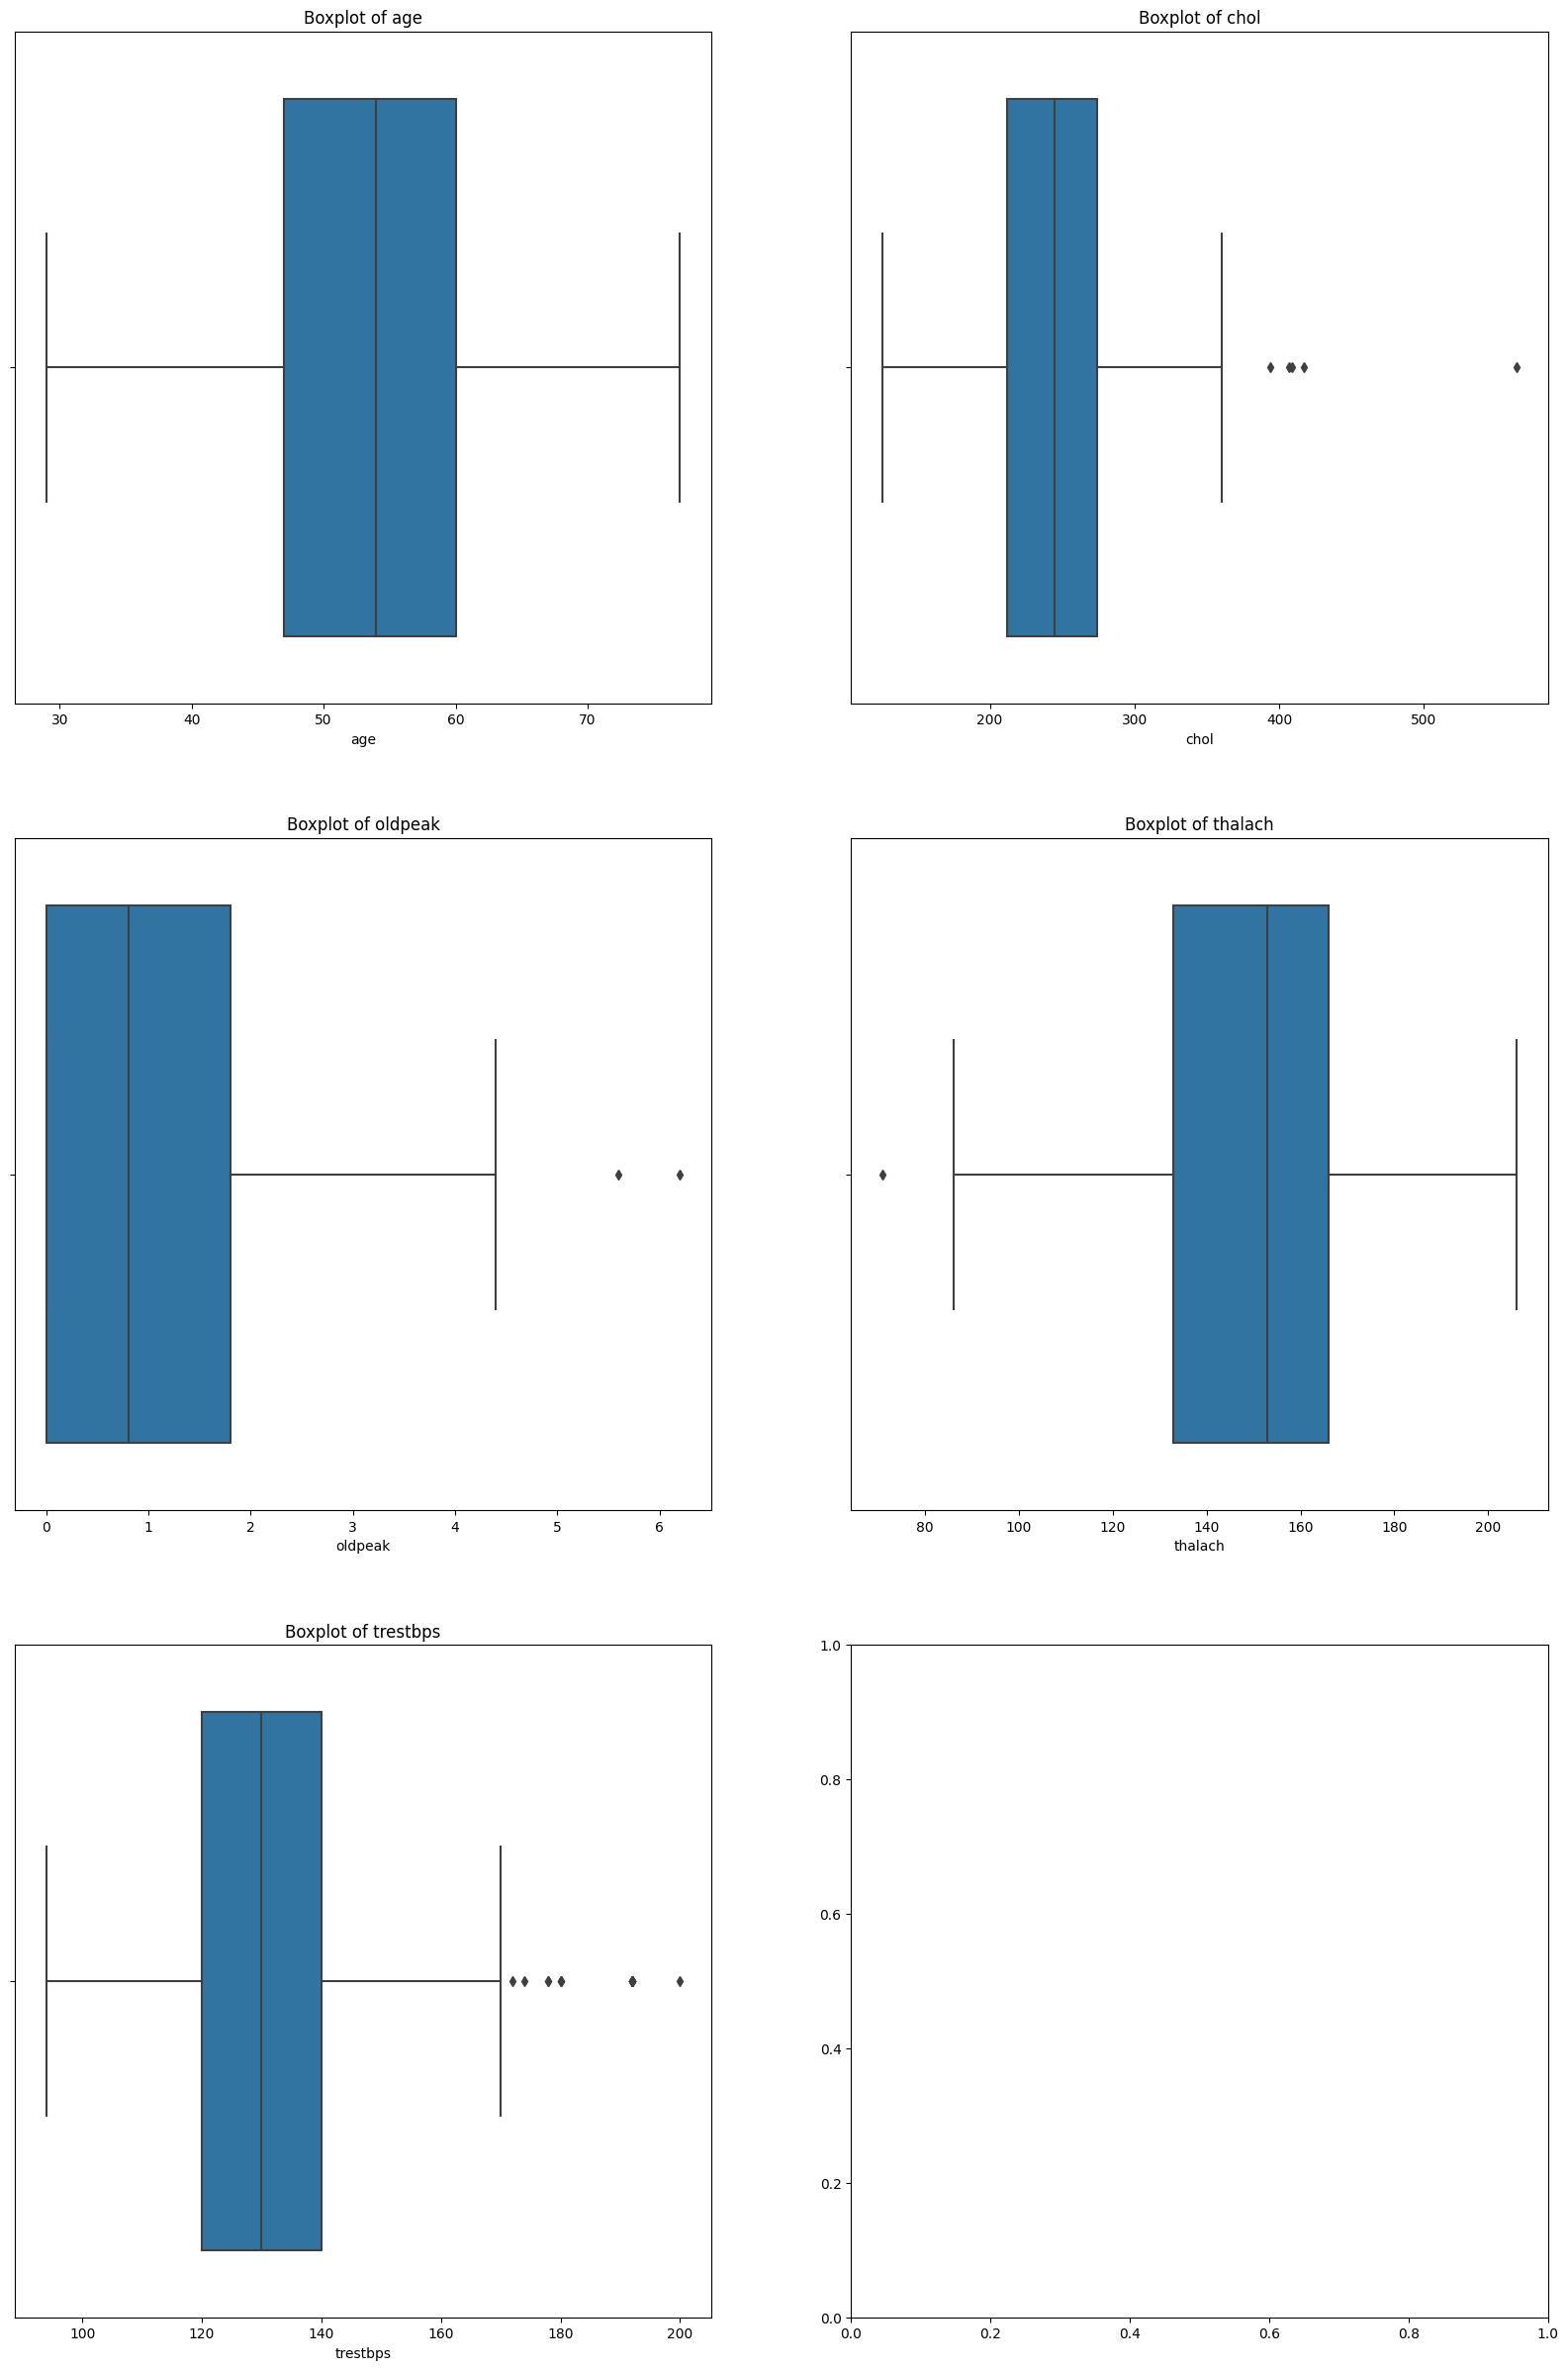

In [11]:
_, ax = plt.subplots(3,2, figsize=(20,30))
ax = ax.ravel()
for i,col in enumerate(continous_col):
    sns.boxplot(x=col, data=df, ax = ax[i])
    ax[i].set_title('Boxplot of {}'.format(col))

**Nhận xét**:
* Cột chol, oldpeak, thalach, trestbps có xuất hiện outlier
* Thao tác với outlier được thực hiện feature engineering

* Quan sát phân phối của biến liên tục

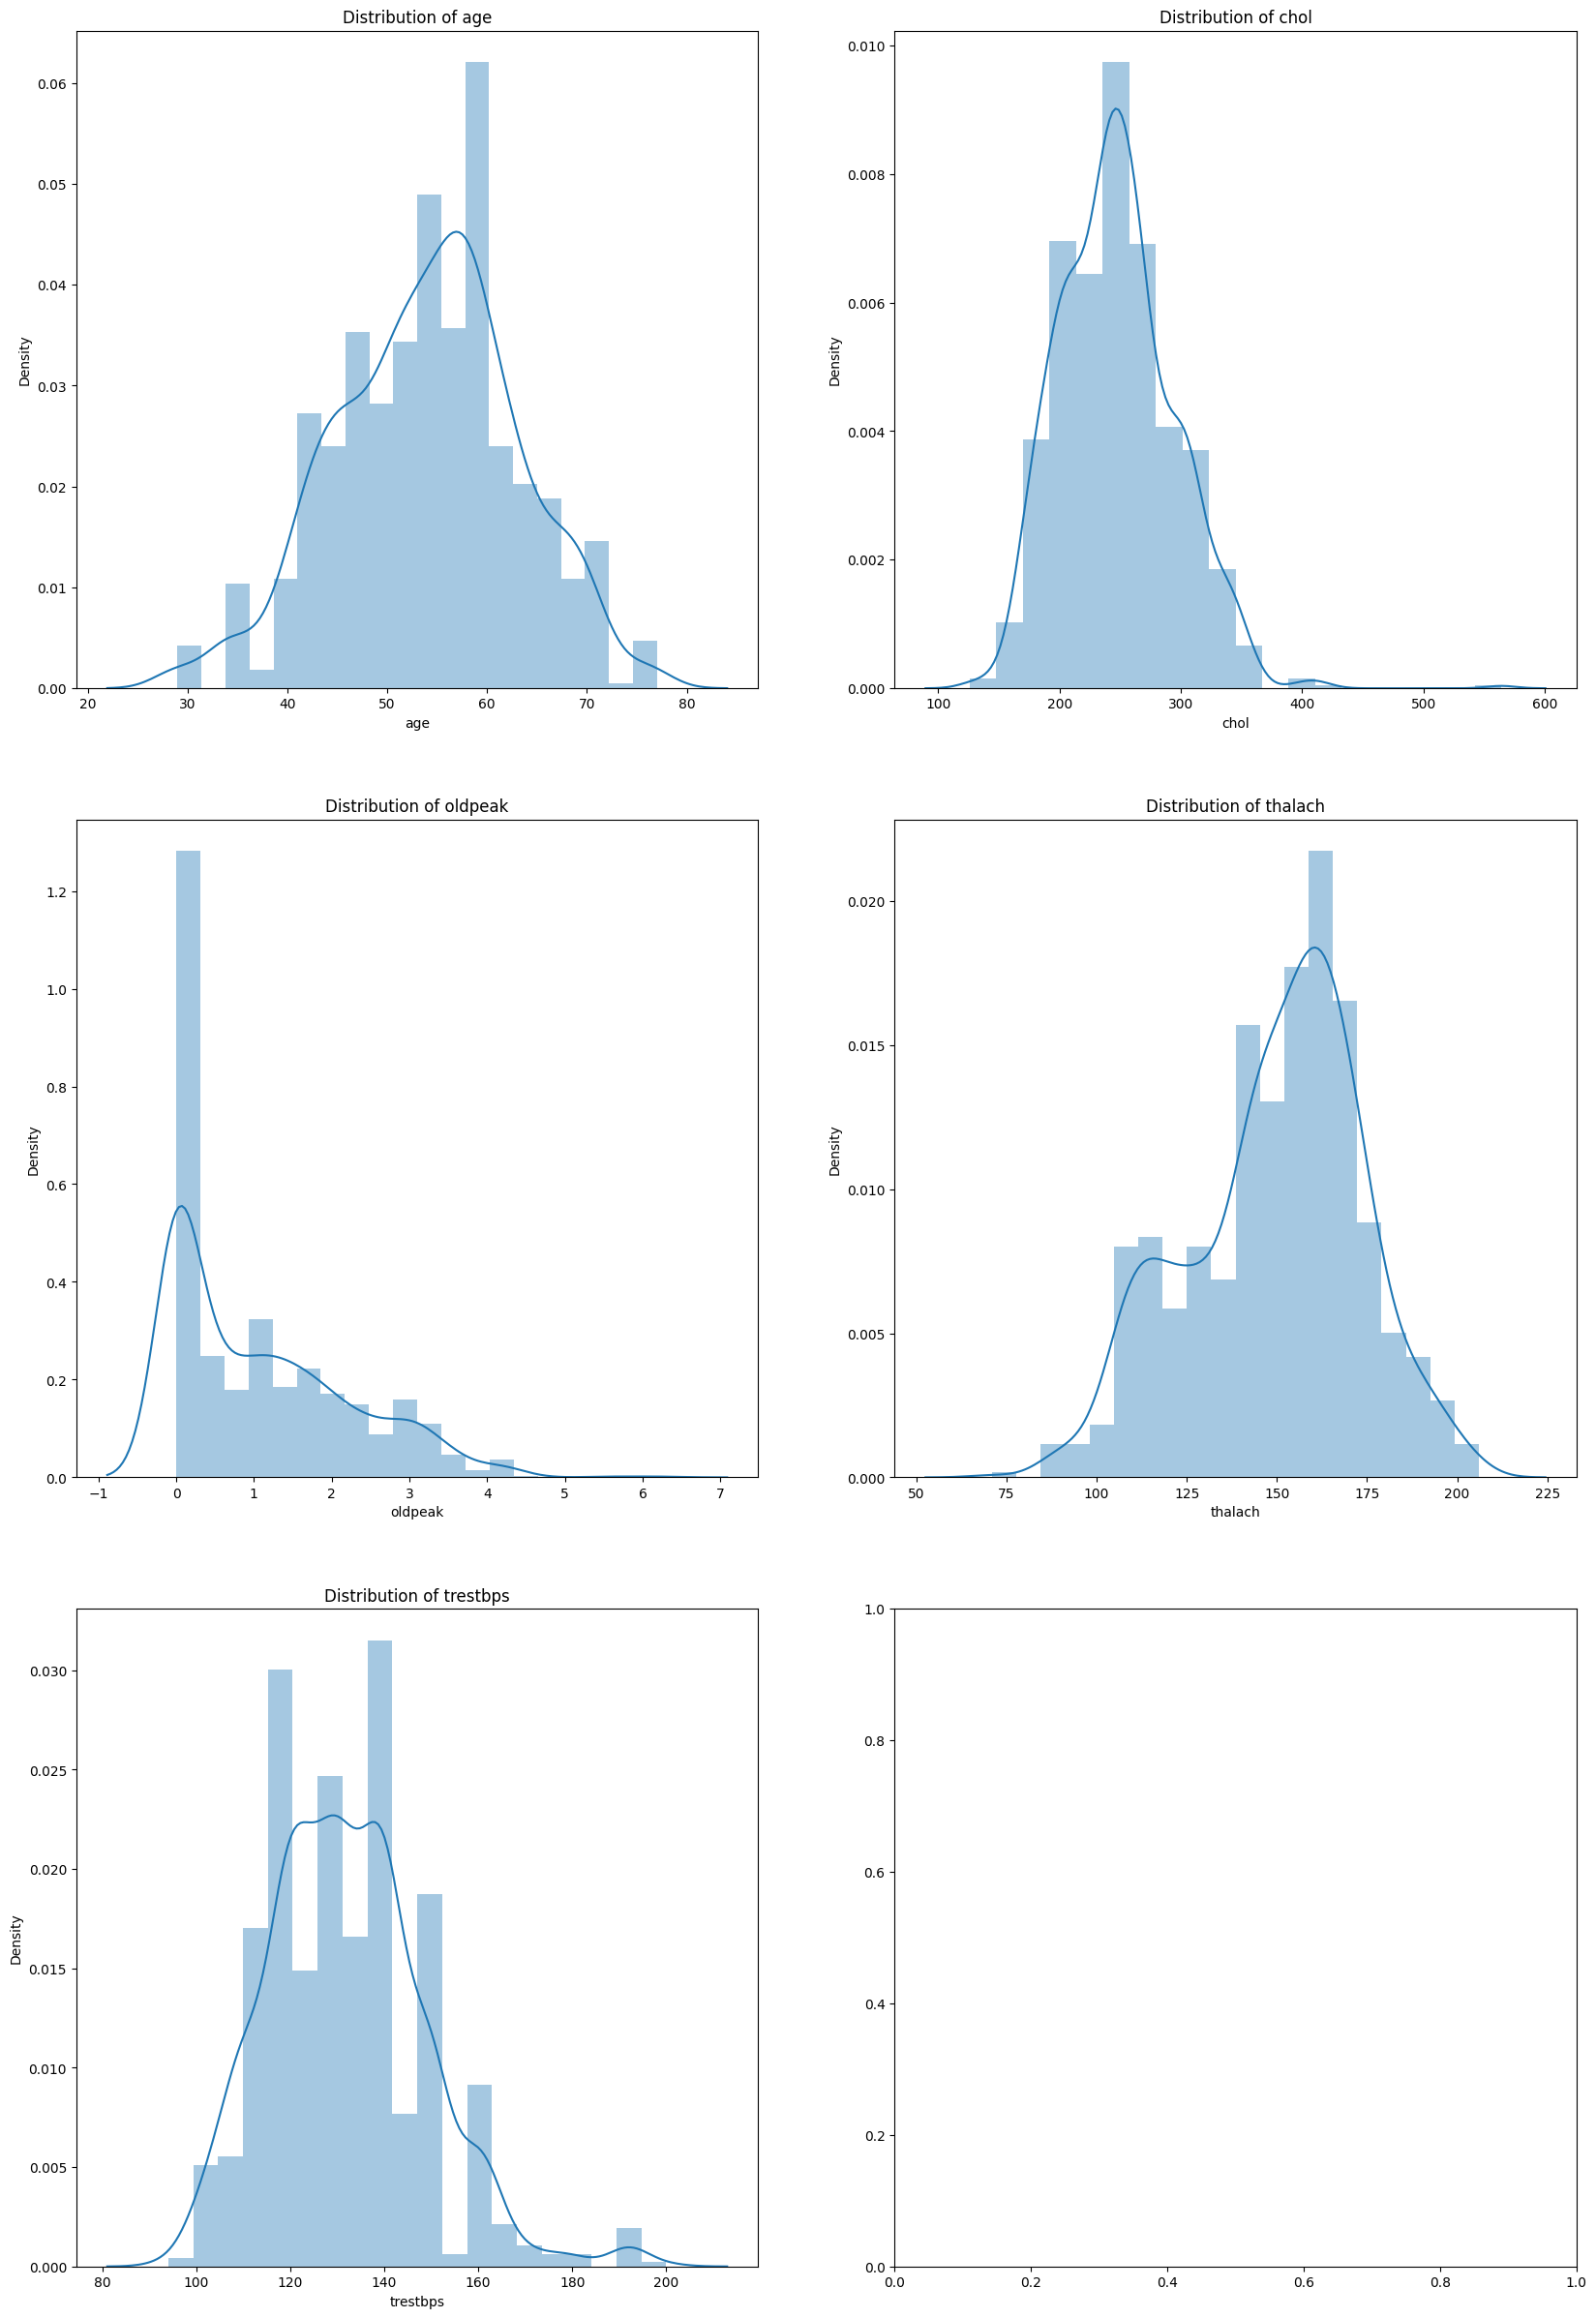

In [12]:
_, ax = plt.subplots(3,2, figsize=(20,30))
ax = ax.ravel()
for i,col in enumerate(continous_col):
    sns.distplot(a=df[col], bins= 20, ax = ax[i])
    ax[i].set_title('Distribution of {}'.format(col))

* Kiểm tra phân phối của biến liên tục có phải là một phân phối chuẩn

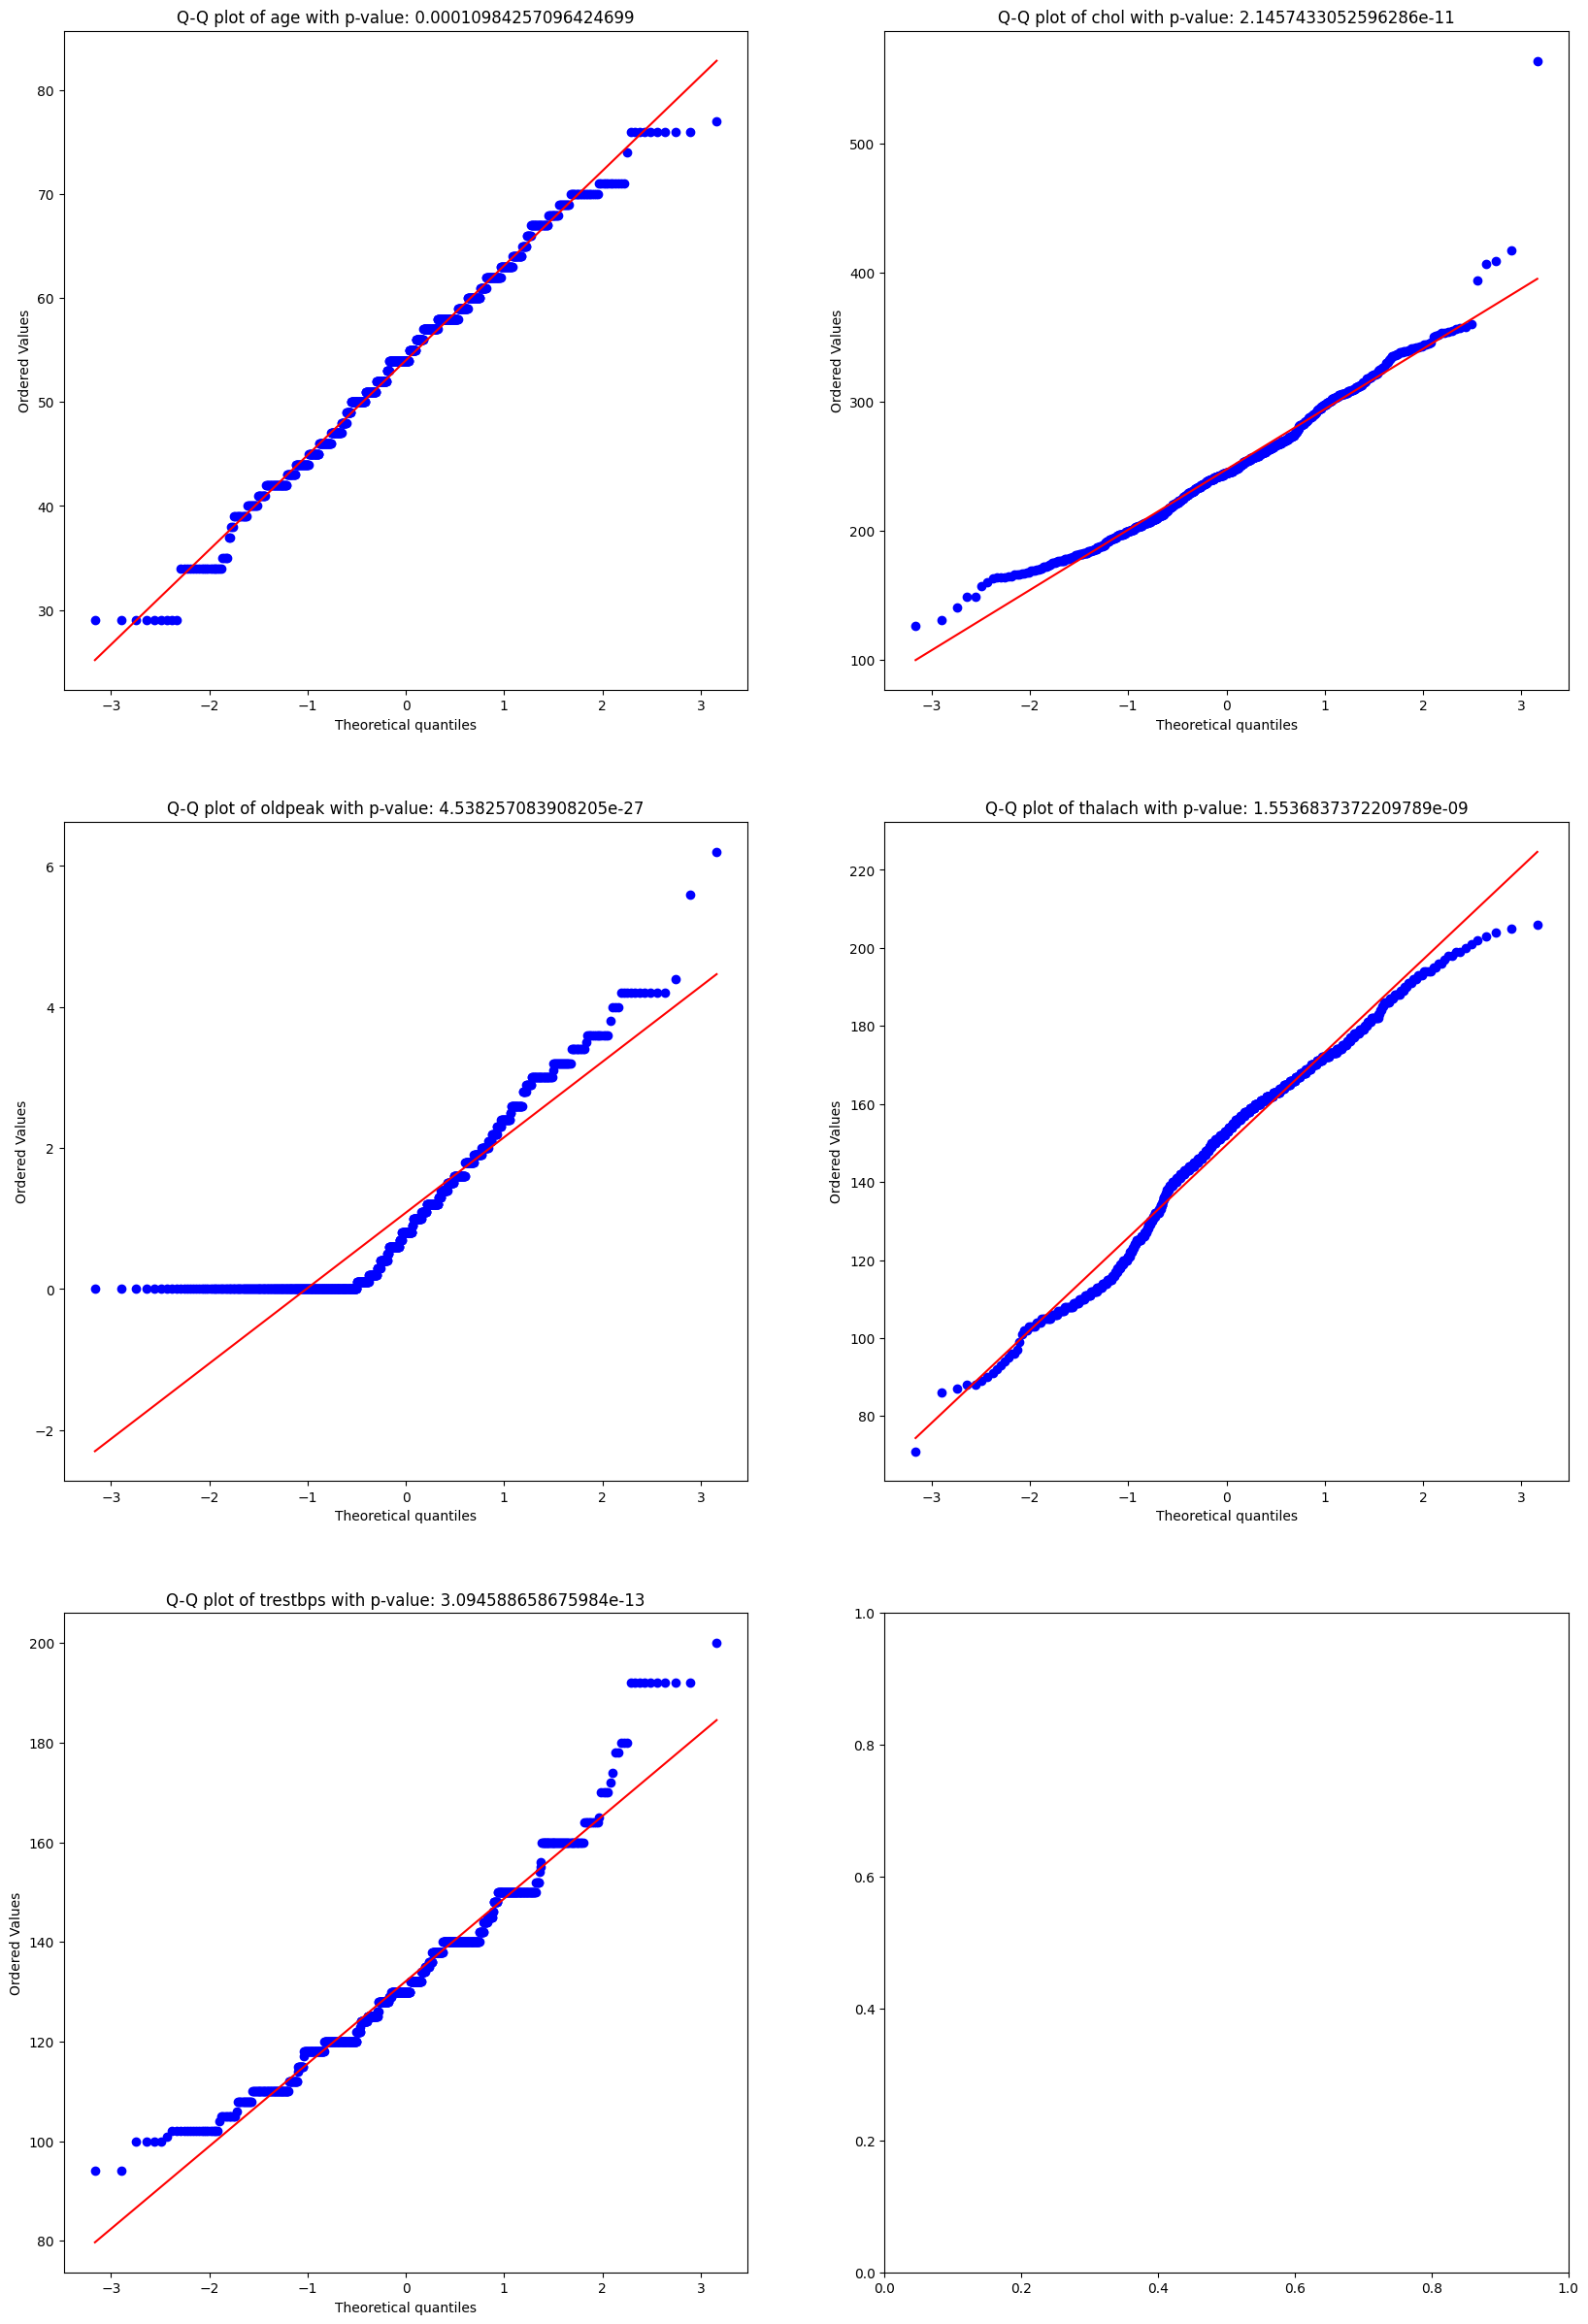

In [13]:
from scipy import stats

_,ax = plt.subplots(3,2, figsize=(20,30))
ax = ax.ravel()
for i,col in enumerate(continous_col):
    stats.probplot(df[col],  plot=ax[i])
    shapiro_test = stats.shapiro(df[col])
    ax[i].set_title('Q-Q plot of {} with p-value: {}'.format(col, shapiro_test.pvalue))
plt.show()

* Với độ tin cậy 95% ta khẳng định các biến liên tục không tuân theo phân phối chuẩn

## Preprocessing

## Feature Engineering

<Axes: >

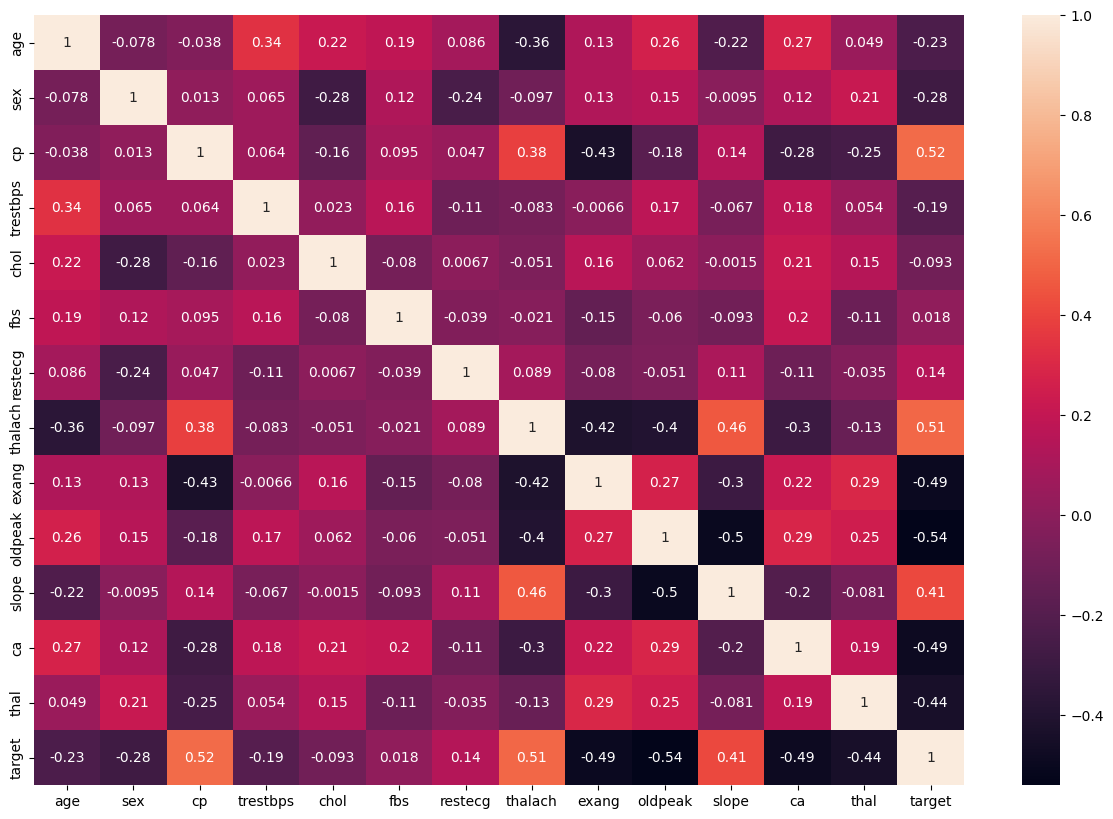

In [14]:
# Heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True) # Show heatmap after normalized data

In [15]:
def prepare_X_y(df):
    """
    Feature engineering and create X and y
    :param df: pandas dataframe
    :return: (X, y) output feature matrix (dataframe), target (series)
    """
    # Todo: Split data into X and y (using sklearn train_test_split). Return two dataframes
    X = df.drop(['target'], axis = 1) # Todo: Select features
    y = df['target']                  # Todo: Select label
    return X, y

X, y = prepare_X_y(df)

## Train-test split

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
RANDOM_STATE = 42
TRAIN_SIZE = 0.85

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

In [17]:
print('Train size: ', X_train.shape[0])
print('Test size: ', X_test.shape[0])

Train size:  753
Test size:  133


# Apply machine learning model

## Build SK-learn model

In [18]:
from sklearn.metrics import classification_report, f1_score, \
                            accuracy_score, precision_score, recall_score, \
                            confusion_matrix

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
import time

# Build model với các tham số mặc định
def build_model(X, y):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :return: a model
    """
    scaler = MinMaxScaler(feature_range=(0,1))
    # Todo: Input your scaler and logistic model into pipeline
    start_time = time.time()
    model = make_pipeline(scaler, LogisticRegression(penalty='l2', 
                                                             tol = 0.0001, 
                                                             C = 1, random_state=42,
                                                             max_iter = 100))
    end_time = time.time() - start_time
    # Todo: fit your model with X, y
    model.fit(X, y)
    return model, end_time

# Tính các metric
def calculate_performance(y_true, y_pred):
    """

    :param y_true: ground truth values
    :param y_pred: predictions
    :return:
    """
    # Todo: return your error value like accuracy, f1score, ...
    print("precision: ", precision_score(y_true=y_true, y_pred=y_pred))
    print("recall: ", recall_score(y_true=y_true, y_pred=y_pred))
    print("accuracy: ", accuracy_score(y_true=y_true, y_pred=y_pred))
    print("F1: ", f1_score(y_true=y_true, y_pred=y_pred))
    print("Classification report: \n", classification_report(y_true=y_true, y_pred=y_pred))
    print("Confusion matrix: \n", confusion_matrix(y_true=y_true, y_pred=y_pred))
    # Todo: Only choose one of them as your score for the question 7
    main_score = f1_score(y_true=y_true, y_pred=y_pred)
    return main_score

model,endtime = build_model(X_train, y_train)
# Compare on training dataset
print('Time to train: ', endtime)
pred = model.predict(X_train)
print('Training performance: ')
print('Main score: ', calculate_performance(y_train, pred))
print('')
pred = model.predict(X_test)
print('Testing performance: ')
print('Main score: ', calculate_performance(y_test, pred))

Time to train:  5.626678466796875e-05
Training performance: 
precision:  0.9255079006772009
recall:  0.9715639810426541
accuracy:  0.9402390438247012
F1:  0.9479768786127168
Classification report: 
               precision    recall  f1-score   support

           0       0.96      0.90      0.93       331
           1       0.93      0.97      0.95       422

    accuracy                           0.94       753
   macro avg       0.94      0.94      0.94       753
weighted avg       0.94      0.94      0.94       753

Confusion matrix: 
 [[298  33]
 [ 12 410]]
Main score:  0.9479768786127168

Testing performance: 
precision:  0.9615384615384616
recall:  0.9615384615384616
accuracy:  0.9548872180451128
F1:  0.9615384615384616
Classification report: 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        55
           1       0.96      0.96      0.96        78

    accuracy                           0.95       133
   macro avg       0

In [19]:
# Xuat coef va intercept cua model
print('Coef of each feature: ', model[1].coef_)
print('Intercept of model: ', model[1].intercept_)

Coef of each feature:  [[-0.56350498 -1.85951213  3.22686444 -2.02833244 -0.05291838  0.57828803
   0.14859191  1.84692719 -1.10161909 -3.85285142  1.93572549 -3.17622953
  -2.76042787]]
Intercept of model:  [2.59348171]


<Axes: >

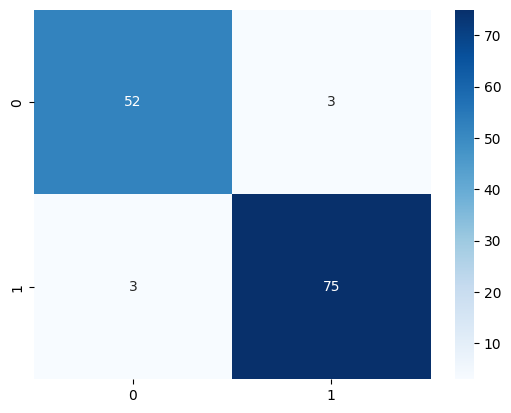

In [20]:
# Bieu do confusion matrix cho viec du doan
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='d', cmap='Blues')

In [21]:
# Training test curve
from sklearn.model_selection import learning_curve

# So sánh độ hiệu quả của model khi train và test
def learning_curves(estimator, data, features, target, train_sizes, cv):
    train_sizes, train_scores, validation_scores = learning_curve(estimator, data[features], y, 
                                                                train_sizes = train_sizes,
                                                                cv = cv, scoring = 'f1',
                                                                shuffle=True, random_state=42)
    train_scores_mean = train_scores.mean(axis = 1)
    validation_scores_mean =  validation_scores.mean(axis = 1)
    plt.plot(train_sizes, train_scores_mean, label = 'Training score')
    plt.plot(train_sizes, validation_scores_mean, label = 'Validation score')

    plt.ylabel('Score', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    title = 'Learning curves for a ' + str(estimator).split('(')[0] + ' model'
    plt.title(title, fontsize = 18, y = 1.03)
    plt.legend()
    plt.ylim(0,1)

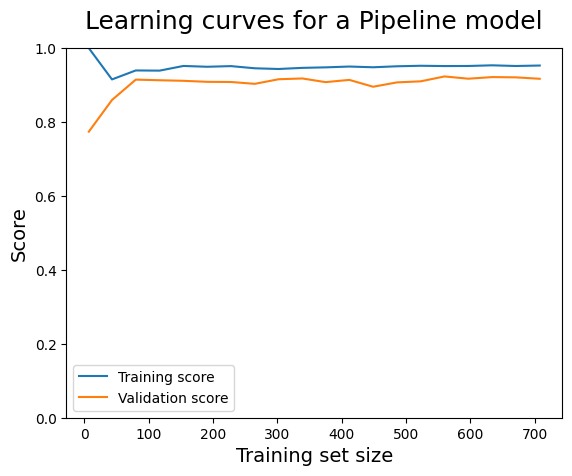

In [22]:
learning_curves(model, df, X_train.columns, df['target'], np.linspace(0.01, 1.0, 20), 5)

Decision Boundary với model L1 và L2

In [23]:
from sklearn.manifold import TSNE
from sklearn.inspection import DecisionBoundaryDisplay

def decision_boundary(model, X, y, ax):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    h = 0.02
    
    # Tao grid point tren plot
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Ve decision boundary dua tren du doan cua model
    z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    
    # Ve decision boundary
    ax.contourf(xx, yy, z, cmap=plt.cm.Paired, alpha=0.8)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    legend = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")

def plot_scatter(X, y, title, ax, model=None, predict_plot = False):
    draw_data = X.copy()
    draw_data= MinMaxScaler().fit_transform(draw_data)
    draw_data = TSNE(n_components=2, learning_rate = 'auto', 
                     random_state=42, perplexity=3, init='random').fit_transform(draw_data)
    if predict_plot == True:
        if model is None:
          model = LogisticRegression(penalty='l2', tol = 0.0001, C = 1, random_state=42,max_iter = 100)
        model.fit(draw_data,y)
        
        decision_boundary(model, draw_data, y, ax)
        title = title + f'with score: {f1_score(y, model.predict(draw_data)):.3f}'
    else:
        colors = {1: 'red', 0: 'blue'}
        scatter = ax.scatter(draw_data[:,0], draw_data[:,1], c = y)
        legend = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
    ax.set_title(title, fontsize=16)




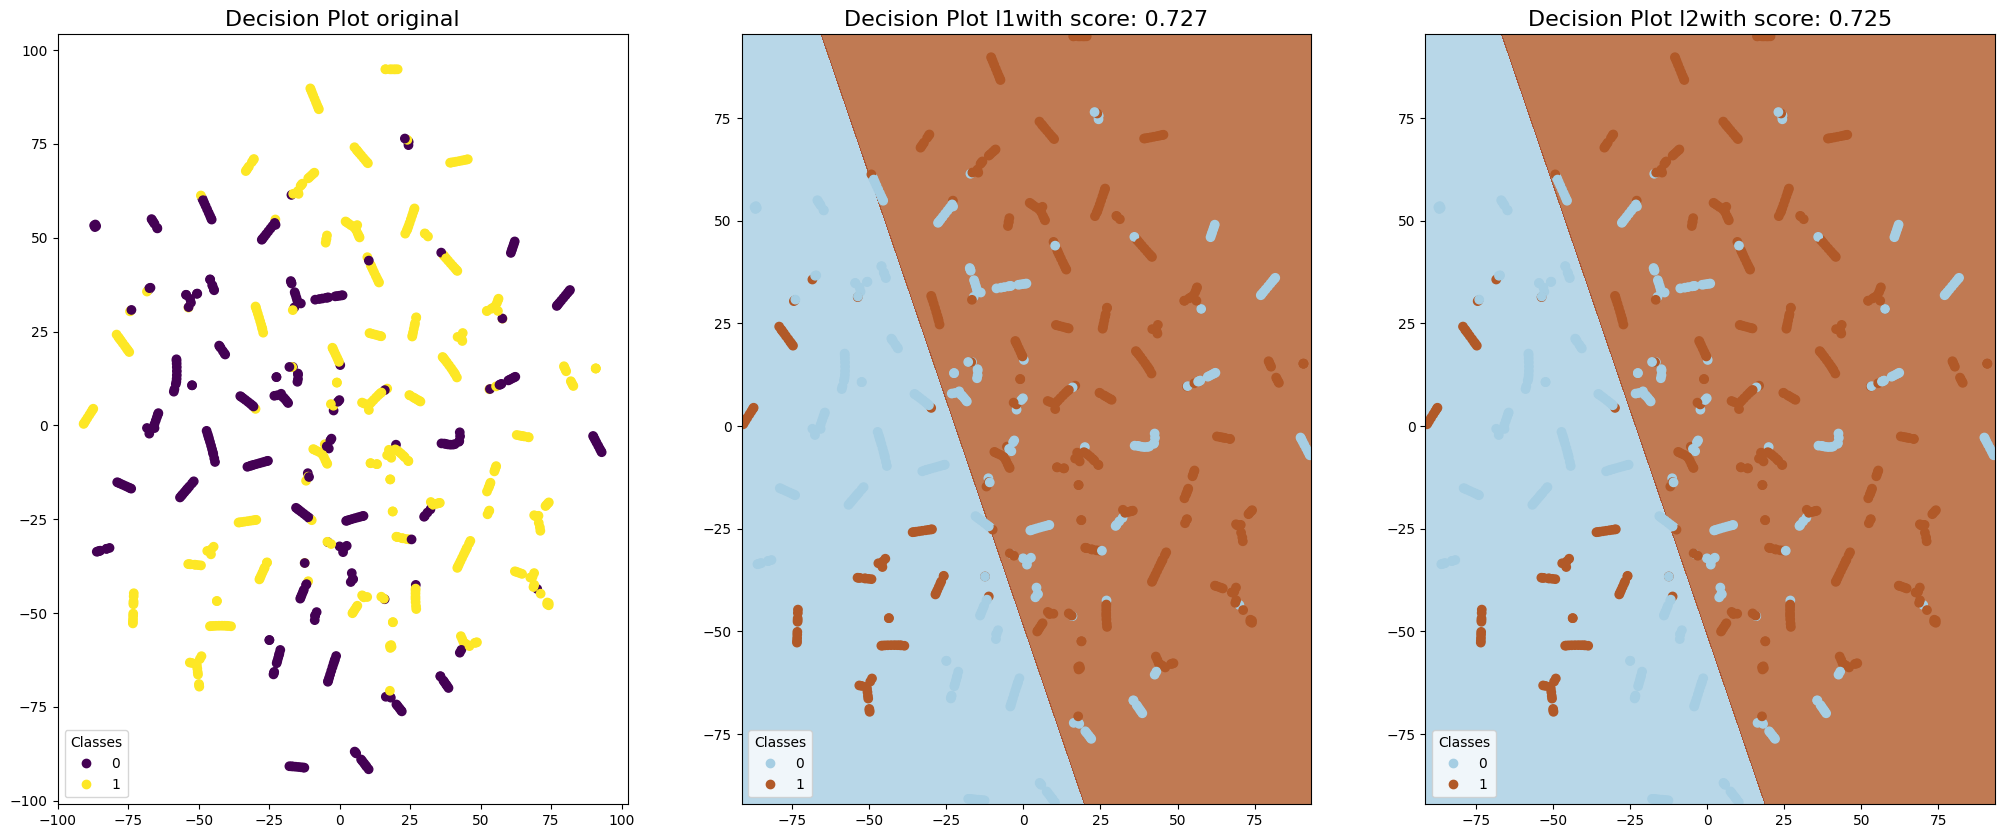

In [24]:
fig, ax = plt.subplots(1,3,figsize=(25,10))

# Scatter plot dữ liệu ban đầu giảm còn 2 chiều đặc trưng 
plot_scatter(X_train, y_train, 'Decision Plot original' ,ax[0], predict_plot = False, model=None)

# Scatter plot cho model với tham số l1
plot_scatter(X_train, y_train, 'Decision Plot l1' ,ax[1], predict_plot = True, model=LogisticRegression(penalty='l1', 
                                                                                                tol = 0.0001, 
                                                                                                solver = 'saga',
                                                                                                C = 1, random_state=42,
                                                                                                max_iter = 100))


# Scatter plot cho model với tham số l2
plot_scatter(X_train, y_train, 'Decision Plot l2' ,ax[2], predict_plot = True, model=None)

## Fine-tuning model

In [25]:
from sklearn.base import BaseEstimator
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.compose import ColumnTransformer


# Xử lí outlier trong pipeline - Xóa comment nếu muốn xác thực kết quả
# class CustomOutlier(BaseEstimator):
#     def __init__(self, method='IQR'):
#         self.method = method

#     def fit(self, X, y=None):
#         q1 = np.percentile(X, 25)
#         q3 = np.percentile(X, 75)
#         iqr = q3 - q1
#         self.upper_bound = q3 + 1.5 * iqr
#         self.lower_bound = q1 - 1.5 * iqr
#         return self

#     def transform(self, X, y=None):
#         if self.method == 'IQR':
#             X = np.where(X > self.upper_bound, self.upper_bound, np.where(X < self.lower_bound, self.lower_bound, X))
#         return X

#     def fit_transform(self, X, y=None):
#         return self.fit(X, y).transform(X, y)

In [26]:
class Model:
    def __init__(self, name, cat_col, con_col) -> None:
        self.cat_col = cat_col
        self.con_col = con_col
        self.model = {
            'lr_default': LogisticRegression(penalty = 'none'),
            'lr_l1': LogisticRegression(penalty = 'l1'),
            'lr_l2': LogisticRegression(penalty = 'l2'),
            'lr_enet': LogisticRegression(penalty = 'elasticnet')
        }
        
        self.params = {
              'lr_l2' : {
                  'solver': ['newton-cg', 'sag','lbfgs', 'liblinear','newton-cholesky','saga' ],
                  'tol': [1e-6, 1e-5, 1e-4],
                  'C': [0.001,0.01,0.1,1,10],
                  'random_state': [42],
                  'max_iter': 10**np.array([2,3,4]),
                  'n_jobs': [-1]
              },
              'lr_default': {
                  'solver': ['newton-cg', 'sag','lbfgs','newton-cholesky','saga' ],
                  'tol': [1e-6,1e-5,1e-4],
                  'random_state': [42],
                  'max_iter': 10**np.array([2,3,4]),
                  'n_jobs': [-1]
              },
              'lr_l1': {
                  'solver': ['liblinear','saga' ],
                  'tol': [1e-6, 1e-5, 1e-4],
                  'C': [0.001,0.01,0.1,1,10],
                  'random_state': [42],
                  'max_iter': 10**np.array([2,3,4]),
                  'n_jobs': [-1]
              },
              'lr_enet': {
                  'solver': ['saga' ],
                  'tol': [1e-6, 1e-5, 1e-4],
                  'C': [0.001,0.01,0.1,1,10],
                  'max_iter': 10**np.array([2,3,4]),
                  'l1_ratio': np.arange(0.1,1,0.1),
                  'n_jobs': [-1],
                  'random_state': [42]
              }
            
        }
        self.grid = None
        self.name = name

    # Fit pipeline model: feature engeering -> model
    def fit(self, X, y):
        # Xử lí outlier cho cột đặc trưng liên tục - Xóa comment để xác thực kết quả
        # ct_outlier = ColumnTransformer(
        #     transformers = [
        #         ('outlier', CustomOutlier(method = 'iqr'), self.con_col)
        #     ]
        # )
        pipeline_gdsearch = Pipeline(
            steps=[
                # ('outlier', ct_outlier),
                ('scaler', MinMaxScaler()),
                ('estimator', self.model[self.name])
            ]
        )
        if isinstance(self.params[self.name], list):
            params_grid = []
            for dic in self.params[self.name]:
                param = {}
                for key, value in dic.items():
                    param['estimator__%s' % key] = value
                params_grid.append(param)
        else:
            params_grid = {}
            for param, value in self.params[self.name].items():
                params_grid['estimator__%s' % param] = value
        self.grid = GridSearchCV(pipeline_gdsearch, params_grid, cv=10, 
                                 scoring='f1', 
                                 n_jobs=-1, return_train_score=True,)
        self.grid.fit(X, y)
    
    # Hiển thị thống kê tham số tối ưu
    def stat_compare_hyperparams(self):
        if self.grid is None:
            raise ValueError("You must fit the model first")
        results_df = pd.DataFrame(self.grid.cv_results_)
        results_df = results_df.sort_values(by=['rank_test_score'])
        results_df = results_df.set_index(
            results_df['params'].apply(lambda x: ', '.join(
                str(value) for value in x.values()
            )).rename_axis(', '.join(str(key).replace('estimator__', '') for key in results_df.loc[0, 'params']))
        )
        return results_df[['rank_test_score', 'mean_test_score', 'std_test_score']]
    
    # Tính score cho model
    def f1_score(self, X, y):
        return self.grid.score(X, y)

In [27]:
# Thử nghiệm model với 4 penalty và hyperparameter tương ứng 
models = ['lr_default', 'lr_l1', 'lr_l2', 'lr_enet']
results = {}

# Train model
for model in models:
    results[model] = Model(model, categorical_col, continous_col)
    results[model].fit(X_train, y_train)

In [28]:
# Tính score cho mỗi model
score = []
for model in models:
    score.append(results[model].f1_score(X_test, y_test))

df_score = pd.DataFrame({"Score":score}, index=models)
df_score

,Score
lr_default,0.967742
lr_l1,0.967742
lr_l2,0.967742
lr_enet,0.967742


In [29]:
for model in models: 
  print(f'Model: {model}: ')
  display(results[model].stat_compare_hyperparams().iloc[:5,:])
  print('')

Model: lr_default: 


,rank_test_score,mean_test_score,std_test_score
params,,,
"100, -1, 42, newton-cg, 1e-06",1,0.947305,0.015968
"1000, -1, 42, newton-cholesky, 1e-06",1,0.947305,0.015968
"1000, -1, 42, newton-cholesky, 1e-05",1,0.947305,0.015968
"1000, -1, 42, newton-cholesky, 0.0001",1,0.947305,0.015968
"1000, -1, 42, saga, 1e-06",1,0.947305,0.015968



Model: lr_l1: 


,rank_test_score,mean_test_score,std_test_score
params,,,
"1, 1000, -1, 42, saga, 0.0001",1,0.94867,0.012953
"1, 100, -1, 42, saga, 1e-06",1,0.94867,0.012953
"1, 100, -1, 42, saga, 1e-05",1,0.94867,0.012953
"1, 100, -1, 42, saga, 0.0001",1,0.94867,0.012953
"1, 1000, -1, 42, saga, 1e-06",1,0.94867,0.012953



Model: lr_l2: 


,rank_test_score,mean_test_score,std_test_score
params,,,
"10, 10000, -1, 42, saga, 0.0001",1,0.949521,0.015825
"10, 1000, -1, 42, sag, 0.0001",1,0.949521,0.015825
"10, 1000, -1, 42, sag, 1e-05",1,0.949521,0.015825
"10, 1000, -1, 42, sag, 1e-06",1,0.949521,0.015825
"10, 1000, -1, 42, newton-cg, 0.0001",1,0.949521,0.015825



Model: lr_enet: 


,rank_test_score,mean_test_score,std_test_score
params,,,
"10, 0.30000000000000004, 10000, -1, 42, saga, 0.0001",1,0.949521,0.015825
"10, 0.6, 1000, -1, 42, saga, 0.0001",1,0.949521,0.015825
"10, 0.6, 1000, -1, 42, saga, 1e-05",1,0.949521,0.015825
"10, 0.6, 1000, -1, 42, saga, 1e-06",1,0.949521,0.015825
"10, 0.6, 100, -1, 42, saga, 0.0001",1,0.949521,0.015825


In [30]:
# Hiển thị best parameter của mỗi model
for model in models: 
    display(results[model].grid.best_estimator_)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('estimator',
                 LogisticRegression(n_jobs=-1, penalty='none', random_state=42,
                                    solver='newton-cg', tol=1e-06))])

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('estimator',
                 LogisticRegression(C=1, n_jobs=-1, penalty='l1',
                                    random_state=42, solver='saga',
                                    tol=1e-06))])

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('estimator',
                 LogisticRegression(C=10, n_jobs=-1, random_state=42,
                                    solver='newton-cg', tol=1e-06))])

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('estimator',
                 LogisticRegression(C=10, l1_ratio=0.1, n_jobs=-1,
                                    penalty='elasticnet', random_state=42,
                                    solver='saga', tol=1e-06))])

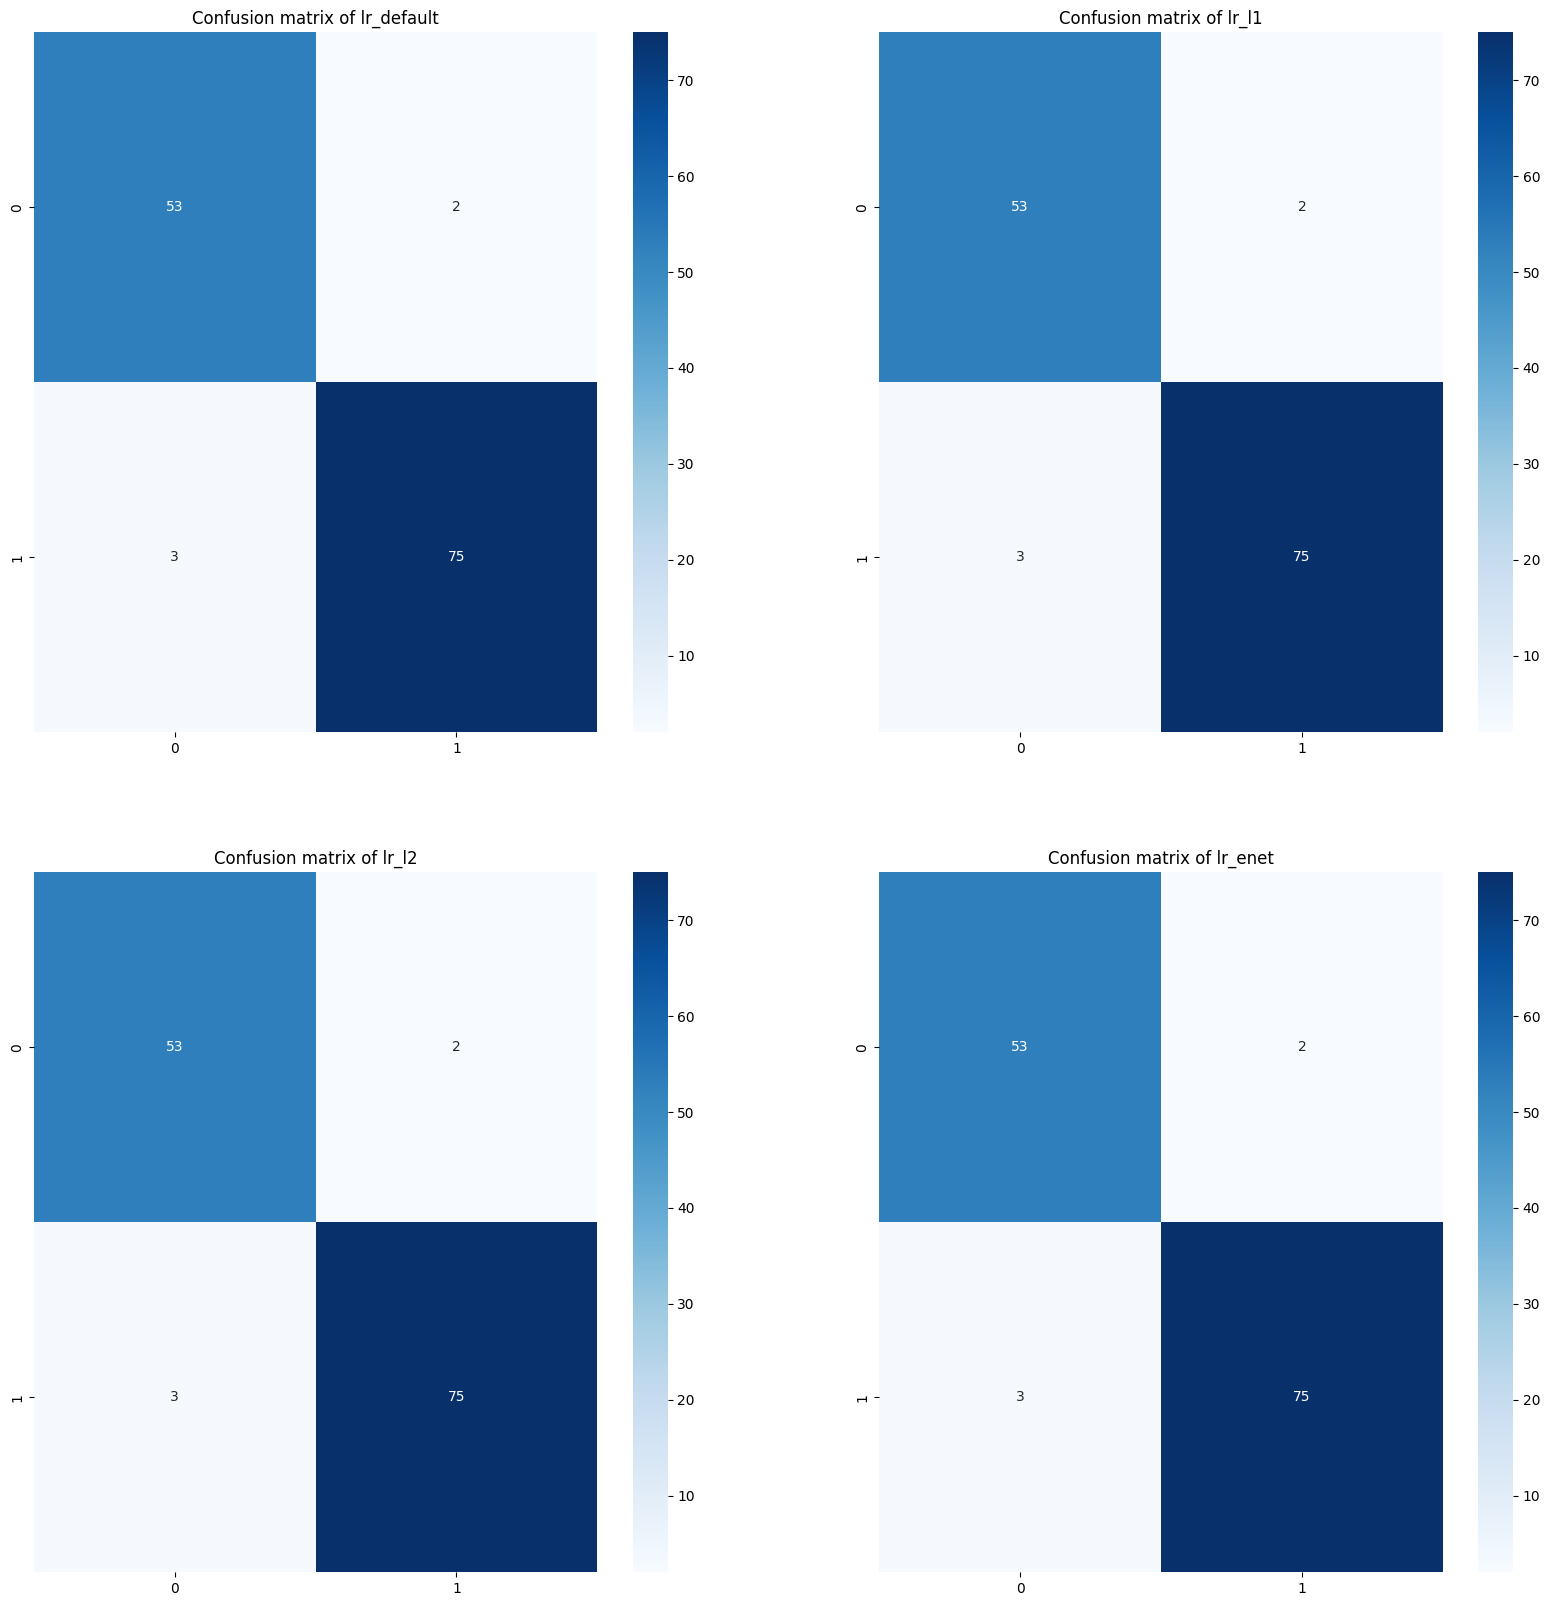

In [31]:
# Plot confusion matrix
_, ax = plt.subplots(2,2, figsize=(20,20))
ax = ax.ravel()
for i,model in enumerate(models):
    pred = results[model].grid.predict(X_test)
    sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='d', cmap='Blues', ax=ax[i])
    ax[i].set_title(f'Confusion matrix of {model}')
plt.show()

* Top 3 đặc trưng tác động lớn đến quá trình training

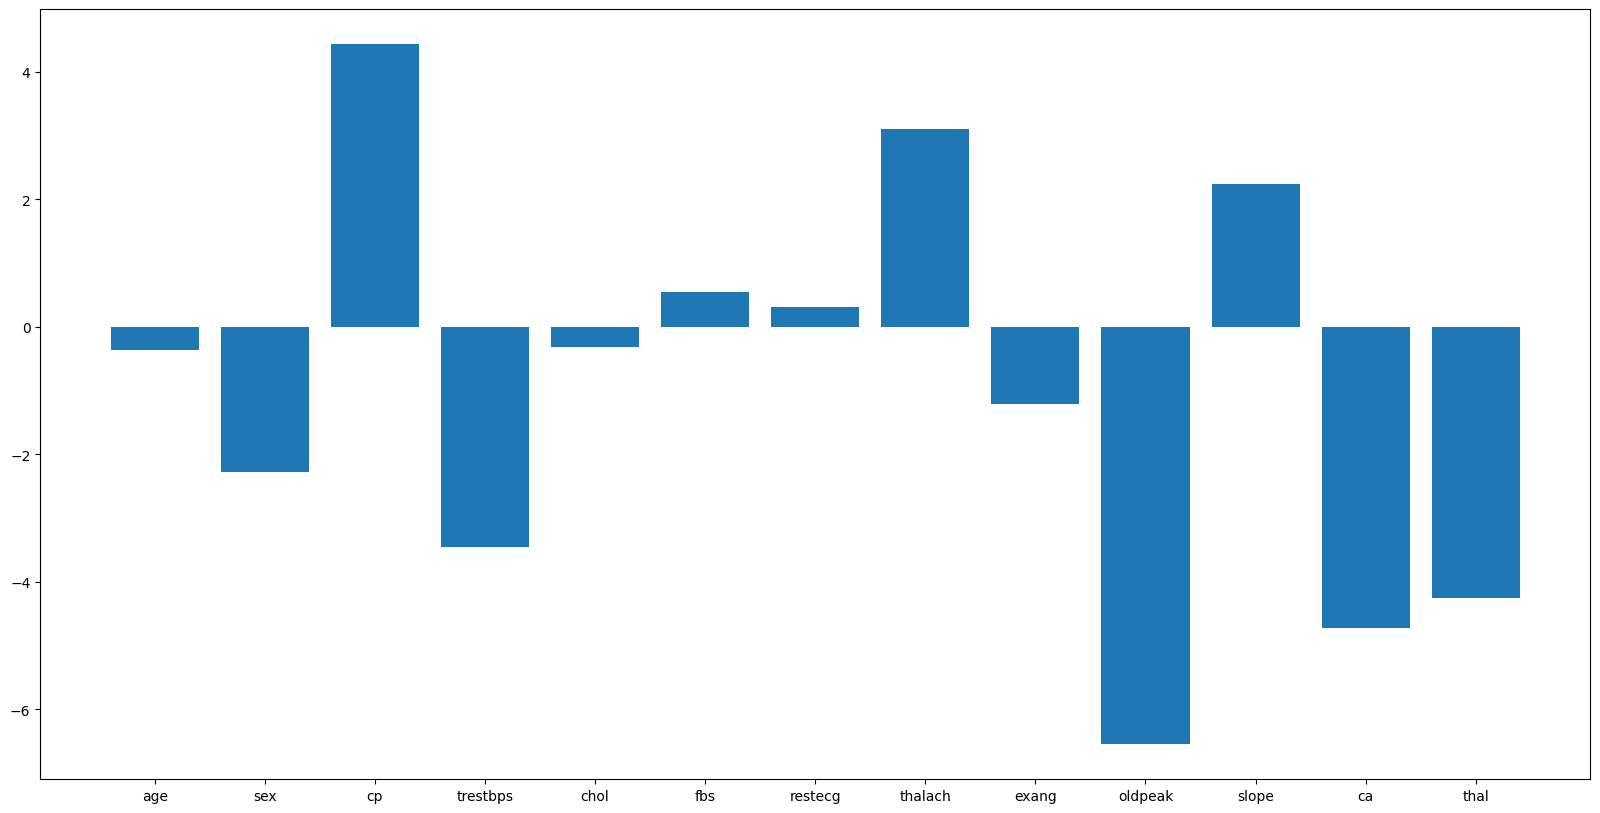

In [32]:
importance = results['lr_l2'].grid.best_estimator_[1].coef_[0]
plt.figure(figsize=(20,10))
plt.bar(X_train.columns, importance, )
plt.show()

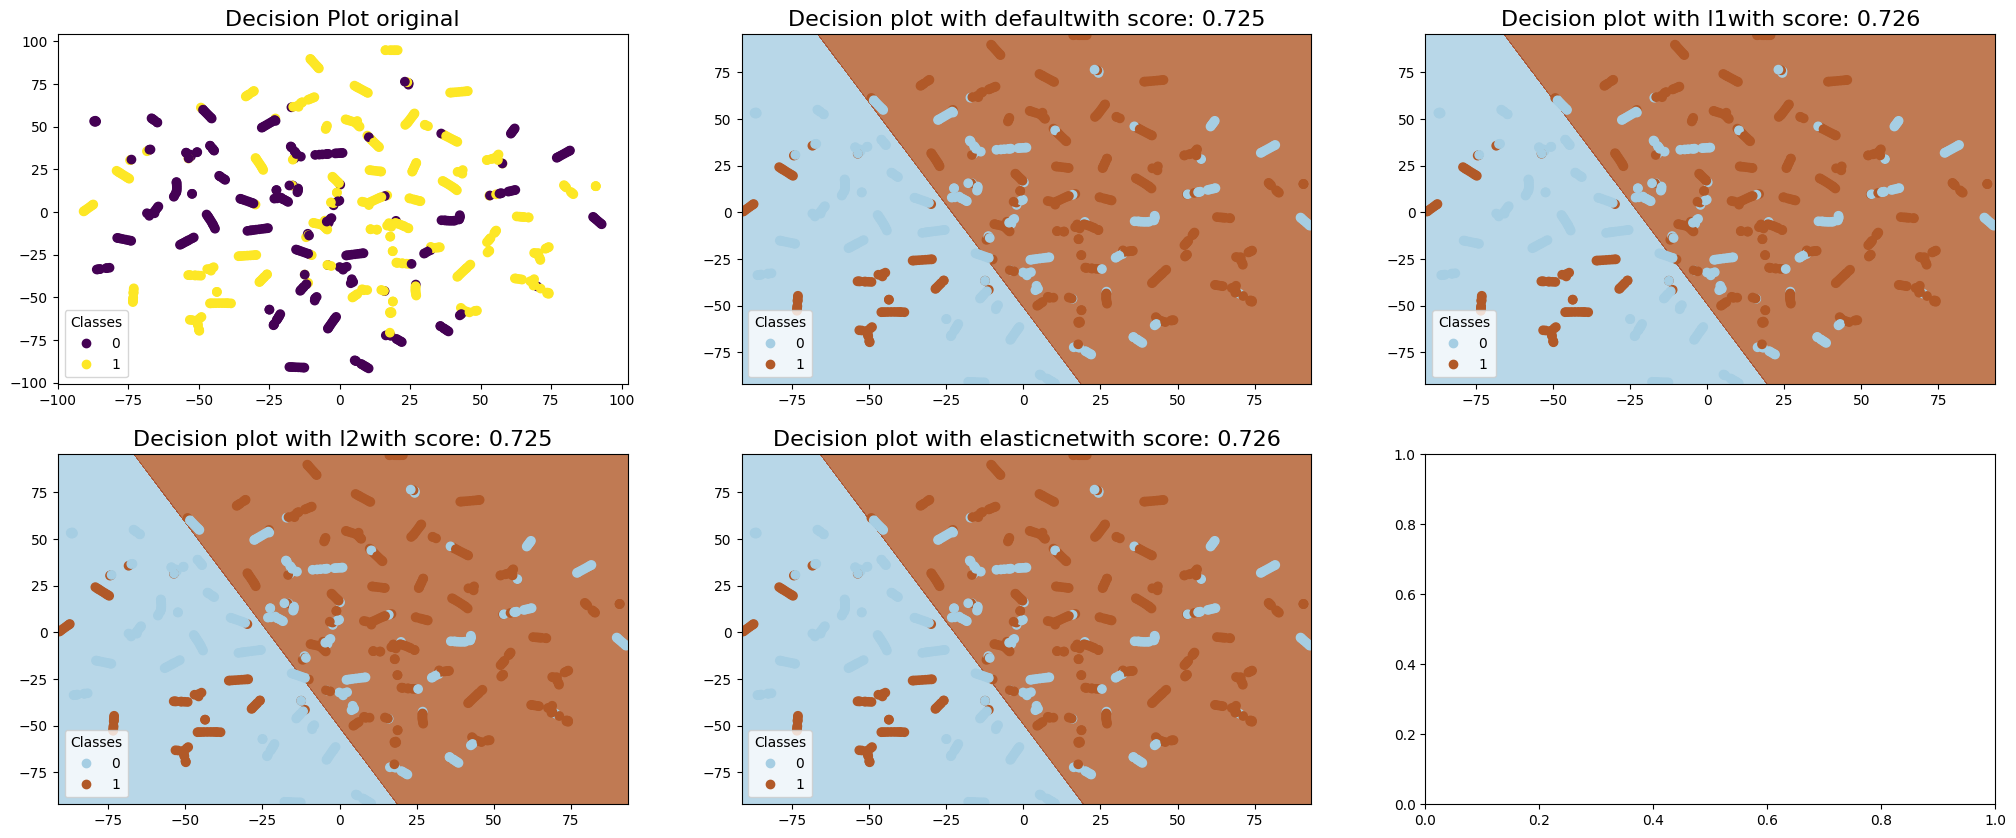

In [33]:
fig, ax = plt.subplots(2,3,figsize=(25,10))
ax = ax.ravel()
# Scatter plot dữ liệu ban đầu giảm còn 2 chiều đặc trưng 
plot_scatter(X_train, y_train, 'Decision Plot original' ,ax[0], predict_plot = False, model=None)
models_arr = {
    'default': LogisticRegression(n_jobs=-1, penalty='none', random_state=42,
                   solver='newton-cg', tol=1e-06),
    'l1': LogisticRegression(C=1, n_jobs=-1, penalty='l1', random_state=42, solver='saga',
                   tol=1e-06),
    'l2': LogisticRegression(C=10, n_jobs=-1, random_state=42, solver='newton-cg',
                   tol=1e-06),
    'elasticnet': LogisticRegression(C=10, l1_ratio=0.1, n_jobs=-1, penalty='elasticnet',
                   random_state=42, solver='saga', tol=1e-06)
}
# Scatter plot cho model với tham số 

for i,model in enumerate(models_arr):
  plot_scatter(X_train, y_train, f'Decision plot with {model}' ,ax[i+1], predict_plot = True, model=models_arr[model])



In [38]:
for model in models:
    print(f'Testing performance for {model}: ')
    print('Main score: ', calculate_performance(y_test, results[model].grid.predict(X_test)))
    print('')

Testing performance for lr_default: 
precision:  0.974025974025974
recall:  0.9615384615384616
accuracy:  0.9624060150375939
F1:  0.967741935483871
Classification report: 
               precision    recall  f1-score   support

           0       0.95      0.96      0.95        55
           1       0.97      0.96      0.97        78

    accuracy                           0.96       133
   macro avg       0.96      0.96      0.96       133
weighted avg       0.96      0.96      0.96       133

Confusion matrix: 
 [[53  2]
 [ 3 75]]
Main score:  0.967741935483871

Testing performance for lr_l1: 
precision:  0.974025974025974
recall:  0.9615384615384616
accuracy:  0.9624060150375939
F1:  0.967741935483871
Classification report: 
               precision    recall  f1-score   support

           0       0.95      0.96      0.95        55
           1       0.97      0.96      0.97        78

    accuracy                           0.96       133
   macro avg       0.96      0.96      0.96

# Feature Engineering 2




In [35]:
def feature_engineering(df):
    """
    Feature engineering data
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: preprocess data
    df.drop(['chol', 'fbs'], axis = 1, inplace =True)
    return df

df2 = feature_engineering(df.copy())

## Prepare dataset for training and testing

In [36]:
X2, y2 = prepare_X_y(df2)
RANDOM_STATE = 42
TRAIN_SIZE = 0.85

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

In [39]:
# Thử nghiệm model với 4 penalty và hyperparameter tương ứng 
models2 = ['lr_default', 'lr_l1', 'lr_l2', 'lr_enet']
results2 = {}

for model in models2:
    results2[model] = Model(model, categorical_col, continous_col)
    results2[model].fit(X_train2, y_train2)

In [40]:
# Tính score cho mỗi model
score2 = []
for model in models2:
    score2.append(results2[model].f1_score(X_test2, y_test2))

df_score2 = pd.DataFrame({"Score":score2}, index=models2)
df_score2

,Score
lr_default,0.967742
lr_l1,0.967742
lr_l2,0.967742
lr_enet,0.967742


# Kết luận

In [41]:
def get_conclusion():
    # Todo: Please return your answer, conclusion and opinion right here
    return '7. Metric duoc chon cho bai toan phan loai la f1-score la su ket hop giua precision va recal, '\
                'nguyen nhan cho viec tren xuat phat tu viec ta quan tam den FP: Chuan doan ung thu trong khi khong co benh, '\
                'FN: Chuan doan khong ung thu trong khi co benh. Voi FP cao dong nghia viec nguoi benh ton nhieu chi phi de lam cac thu tuc xet nghiem,'\
                '.Con FN cao thi viec bo sot benh nhan se anh huong nghiem trong den tinh mang con nguoi.' + \
            'Khi so sanh 4 penalty nhan thay khong co su khac biet ve ket qua nen ta co the chon tuy y tham so trong 4 best model: penalty=l2, C=10, n_jobs=-1, random_state=0, solver=newton-cg, tol=1e-06'    

display(get_conclusion())

'7. Metric duoc chon cho bai toan phan loai la f1-score la su ket hop giua precision va recal, nguyen nhan cho viec tren xuat phat tu viec ta quan tam den FP: Chuan doan ung thu trong khi khong co benh, FN: Chuan doan khong ung thu trong khi co benh. Voi FP cao dong nghia viec nguoi benh ton nhieu chi phi de lam cac thu tuc xet nghiem,.Con FN cao thi viec bo sot benh nhan se anh huong nghiem trong den tinh mang con nguoi.Khi so sanh 4 penalty nhan thay khong co su khac biet ve ket qua nen ta co the chon tuy y tham so trong 4 best model: penalty=l2, C=10, n_jobs=-1, random_state=0, solver=newton-cg, tol=1e-06'

* Kết quả:

| Method | Best Score |
|---- | ---- |
| scaler all feature -> model | 0.967742 |
| outlier -> scaler -> model| 0.872727 |
| scaler continous feature -> model | 0.884848 |

* Trong quá trình train model, tôi có so sánh việc không dùng feature eningeering và việc dummy các đặc trưng categorical có 2 giá trị (không dùng hơn 2 do chi phí tính toán cao) không có sự khác biệt khi train model
* Đặc trưng chol và fps không ảnh hưởng đến quá trình dự đoán và vì hệ số tương quan với target là: -0.093 và 0.018
* 3 chỉ số ảnh hưởng đến bệnh tim là ChestPainType, thaLach (Maximum heart rate achieved), ST_Slope (Patient's condition during exercise)